# PROBLEM STATEMENT

Dataset link : https://www.kaggle.com/datasets/zaurbegiev/my-dataset?select=credit_train.csv

## Dataset Information
This dataset contains information on customer demographic factors, credit history data, and loan information data of bank customers who have availed a loan previously. While most of them had fully paid off the loan and closed it, some of them had defaulted and the loan delinquency status went into charge-off.

## Attribute Information
There are about 82000 unique customer records and 19 variables.

* Loan ID: Loan ID of each loan.
* Customer ID: Customer ID of each customer.
* Current Loan Amount: The loan amount of the current loan under consideration.
* Term: Whether short term or loanf term loan.
* Credit Score: The credit score of the client (credit worthiness).
* Annual Income: Annual income of the client.
* Years in current job: Number of years the client has been working in their current job.
* Home Ownership: The type of home ownership of client, wheter on loan (mortgage), rented or owned.
* Purpose: The reason/purpose for taking the current loan.
* Monthly Debt: The total EMI charges and payments made towards already outstanding loans every month.
* Years of Credit History: The number of years since the client first got a credit line approved from a financial institution. In other words, it is the number of years since the client first took a loan or credit from any bank or NBFC.
* Months since last delinquent: The number of months since the last time customer was marked as delinquent. If a customer has been paying on time this number will increase.
* Number of Open Accounts: Number of loan accounts that are currently open.
* Number of Credit Problems: Number of times issues regarding loan repayment have been reported against the client. For example, an issue might be reported if a customer has not made any payment for three consecutive months.
* Current Credit Balance: The current outstanding loan amount.
* Maximum Open Credit: The maximum total loan outstanding amount that the client had at any point of time.
* Bankruptcies: The number of times the customer was reported as bankrupt.
* Tax Liens: The number of times a tax lien was marked against the customer for not paying taxes on time.
* Loan Status: (Target variable) Current loan status, whether fully paid or charge-off. 



## Project Objective

### Background Goal :
The data is from a bank. The bank wants to reduce the risk in its unsecured loans business by limiting the number of defaulters. The outstanding amount, credit history and customer demographic information of various customers is provided for about 82000 customers. Also, their actual loan status is mentioned, whether fully paid or charge-off.

### Objective
Our objective is to build a machine learning model to predict whether a customer will fully pay off their loan or will not pay and will be marked as charge-off, from the provided data. Since the model is related to credit-risk, we need to show cause and hence variable impact and information is important. So it is best that we do not use black box models. Best model would be logistic regression or decision tree.

### Business impact
The model will help the bank to identify potential defaulters from their behaviour pattern. This will provide meaningful business insight into risk management and decision making in regards to payment recovery, and portfolio management. It will futher help in estimating the volume of revenue, profit and loss, non-performing assets, expenses etc. Being able to have a foresight of these paramters will aid in better decision making and increase overall profitability of the business.

# EXPLORATORY DATA ANALYSIS AND VALIDATION

In [2]:
import pandas as pd
credit_train = pd.read_csv("https://raw.githubusercontent.com/A-Bhanupratap/ML_data_files/main/Project_1I_data/credit_train.csv")
print(credit_train.shape)
credit_train.info()

(100514, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  4

In [3]:
credit_test = pd.read_csv("https://raw.githubusercontent.com/A-Bhanupratap/ML_data_files/main/Project_1I_data/credit_test.csv")
print(credit_test.shape)
credit_test.info()

(10353, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  fl

In [4]:
# Checking the overall data for null values

credit_train.head(10)
credit_train.tail(10)

# We have NaN values in train data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
credit_test.head(10)
credit_test.tail(10)

# We have NaN values in test data

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
credit_train.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [7]:
# Checking for duplicate values of Loan ID
credit_train['Loan ID'].duplicated().value_counts()

# We have duplicate 18514 values, which includes null values as well

False    82000
True     18514
Name: Loan ID, dtype: int64

In [8]:
# Checking for duplicate values of Customer ID
credit_train['Customer ID'].duplicated().value_counts()

# We have duplicate 18514 values, which includes null values as well

False    82000
True     18514
Name: Customer ID, dtype: int64

In [9]:
credit_test.head(10)

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0
5,a4957169-d809-44cc-847b-975400bc8d11,6878d414-6a22-4712-ae43-9b3f798e463a,202928.0,Short Term,741.0,760380.0,1 year,Rent,Debt Consolidation,6526.69,13.8,NaN,6.0,0.0,258647.0,476872.0,0.0,0.0
6,43467302-94fe-494b-b52f-3fd891fea71c,48113a98-a4a0-4956-b57d-f0ce344826fb,621786.0,Long Term,733.0,1783606.0,10+ years,Home Mortgage,Debt Consolidation,36563.98,15.3,NaN,42.0,0.0,281599.0,1449162.0,0.0,0.0
7,930c7cb3-6086-434a-9547-3ed41c181552,19941661-98e2-4800-93c9-a0e92057c813,266794.0,Long Term,NaN,NaN,< 1 year,Own Home,Debt Consolidation,12336.89,5.8,NaN,9.0,0.0,233206.0,342232.0,0.0,0.0
8,0b2f1b66-741e-4e37-a929-99926cdc9e9a,6a1adeda-079b-49e5-ac7c-91828f2806a0,202466.0,Short Term,736.0,1068617.0,5 years,Rent,Debt Consolidation,18745.21,20.5,NaN,2.0,0.0,0.0,0.0,0.0,0.0
9,d08f3a5e-93df-40e7-bdd8-cba59180bddf,4080a828-a61a-4f04-a627-397f4319500c,266288.0,Long Term,683.0,2031518.0,2 years,Rent,Debt Consolidation,12443.10,24.4,56.0,8.0,2.0,31445.0,251130.0,2.0,0.0


Checking for duplicate values in Test data

In [10]:
credit_test['Loan ID'].duplicated().value_counts()

False    10001
True       352
Name: Loan ID, dtype: int64

In [11]:
credit_test['Loan ID'].duplicated().value_counts()

False    10001
True       352
Name: Loan ID, dtype: int64

## Findings

Train data has all the required variables. [Loan Status] is the target variable.
Test data is missing the target variable. So, it cannot be used to validate the model. We ignore the test data from the file credit_test.csv for now.
Use the train data as the overall data.

Actions :
1. Train data also has NaN values. First step is to delete them. Delete the rows.
2. Train data has duplicates 18000 duplicate values of Customer ID and Loan ID. Need to check and find out a condition as to which one of the duplicate values to keep and which one to drop.



### Deleting NaN rows

In [12]:
credit_data = credit_train.copy()

In [13]:
# Getting the index of all NaN values in Loan ID variable

na= credit_data[credit_data['Loan ID'].isnull()].index.tolist()
len(na)

514

In [14]:
credit_data.drop(na, inplace=True)
print(credit_data.shape)

(100000, 19)


### Handling duplicate values

In [15]:
# Getting the records of duplicate values of Loan ID
credit_data[credit_data['Loan ID'].duplicated()==True]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
420,a1301a8a-e66e-4747-beb7-c2f243f2c689,ab46b1a7-f937-4ba9-ac98-270344120cf7,Fully Paid,152372.0,Short Term,697.0,845937.0,< 1 year,Rent,Debt Consolidation,2876.22,8.8,46.0,10.0,0.0,56943.0,215468.0,0.0,0.0
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.0,Long Term,689.0,866799.0,9 years,Home Mortgage,Debt Consolidation,3676.69,14.1,7.0,4.0,2.0,86051.0,167750.0,2.0,0.0
1003,c5a1a3e9-da4a-4c9e-8d29-2907c613b82f,a239a831-642f-4cf8-926c-beac6ee5f36d,Fully Paid,448712.0,Long Term,696.0,1264602.0,NaN,Home Mortgage,Debt Consolidation,33722.91,16.7,22.0,28.0,2.0,328054.0,895906.0,0.0,2.0
1627,4c1d5195-f43a-44af-8322-f831800ce490,e849b404-a91e-4ffe-92f1-2a06e99d65a6,Fully Paid,751300.0,Short Term,716.0,3614978.0,6 years,Home Mortgage,Debt Consolidation,72600.71,11.9,69.0,29.0,0.0,957752.0,2128522.0,0.0,0.0
1828,191a92bd-67d1-4998-b680-08489937390d,0e0fa488-b6cb-444e-b3cf-c2021a74cad8,Fully Paid,341352.0,Long Term,712.0,751108.0,< 1 year,Home Mortgage,Debt Consolidation,10327.83,13.3,NaN,11.0,0.0,81377.0,110858.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,326d0f2b-015f-480e-90e9-9c0d7d307196,ed9a397b-8a72-45c2-92de-b91f990a623d,Fully Paid,244266.0,Short Term,714.0,1619047.0,10+ years,Rent,Debt Consolidation,4290.39,21.4,NaN,5.0,1.0,132012.0,242660.0,1.0,0.0
99992,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796.0,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.3,NaN,9.0,0.0,87875.0,239404.0,0.0,0.0
99993,79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,Fully Paid,44484.0,Short Term,717.0,1152426.0,10+ years,Home Mortgage,small_business,6280.64,21.0,12.0,6.0,0.0,961932.0,0.0,0.0,0.0
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0


In [16]:
# Checking random records for data of other variables where Loan ID is duplicate

credit_data[credit_data['Loan ID']=='a1301a8a-e66e-4747-beb7-c2f243f2c689']
# Same data in all variables

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
418,a1301a8a-e66e-4747-beb7-c2f243f2c689,ab46b1a7-f937-4ba9-ac98-270344120cf7,Fully Paid,152372.0,Short Term,697.0,845937.0,< 1 year,Rent,Debt Consolidation,2876.22,8.8,46.0,10.0,0.0,56943.0,215468.0,0.0,0.0
420,a1301a8a-e66e-4747-beb7-c2f243f2c689,ab46b1a7-f937-4ba9-ac98-270344120cf7,Fully Paid,152372.0,Short Term,697.0,845937.0,< 1 year,Rent,Debt Consolidation,2876.22,8.8,46.0,10.0,0.0,56943.0,215468.0,0.0,0.0


In [17]:
credit_data[credit_data['Loan ID'].isin(['4c1d5195-f43a-44af-8322-f831800ce490','8506a4e9-af7d-47d2-a1bf-7ea2c41858f0','c568adaa-16f9-43d3-b522-8532fb57cb16',
                                         '326d0f2b-015f-480e-90e9-9c0d7d307196','191a92bd-67d1-4998-b680-08489937390d'])].sort_values(['Loan ID'])

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
204,191a92bd-67d1-4998-b680-08489937390d,0e0fa488-b6cb-444e-b3cf-c2021a74cad8,Fully Paid,341352.0,Long Term,712.0,751108.0,< 1 year,Home Mortgage,Debt Consolidation,10327.83,13.3,NaN,11.0,0.0,81377.0,110858.0,0.0,0.0
1828,191a92bd-67d1-4998-b680-08489937390d,0e0fa488-b6cb-444e-b3cf-c2021a74cad8,Fully Paid,341352.0,Long Term,712.0,751108.0,< 1 year,Home Mortgage,Debt Consolidation,10327.83,13.3,NaN,11.0,0.0,81377.0,110858.0,0.0,0.0
41000,326d0f2b-015f-480e-90e9-9c0d7d307196,ed9a397b-8a72-45c2-92de-b91f990a623d,Fully Paid,244266.0,Short Term,714.0,1619047.0,10+ years,Rent,Debt Consolidation,4290.39,21.4,NaN,5.0,1.0,132012.0,242660.0,1.0,0.0
99991,326d0f2b-015f-480e-90e9-9c0d7d307196,ed9a397b-8a72-45c2-92de-b91f990a623d,Fully Paid,244266.0,Short Term,714.0,1619047.0,10+ years,Rent,Debt Consolidation,4290.39,21.4,NaN,5.0,1.0,132012.0,242660.0,1.0,0.0
1024,4c1d5195-f43a-44af-8322-f831800ce490,e849b404-a91e-4ffe-92f1-2a06e99d65a6,Fully Paid,751300.0,Short Term,716.0,3614978.0,6 years,Home Mortgage,Debt Consolidation,72600.71,11.9,69.0,29.0,0.0,957752.0,2128522.0,0.0,0.0
1627,4c1d5195-f43a-44af-8322-f831800ce490,e849b404-a91e-4ffe-92f1-2a06e99d65a6,Fully Paid,751300.0,Short Term,716.0,3614978.0,6 years,Home Mortgage,Debt Consolidation,72600.71,11.9,69.0,29.0,0.0,957752.0,2128522.0,0.0,0.0
60503,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,NaN,NaN,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
91976,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796.0,Short Term,724.0,431091.0,4 years,Home Mortgage,major_purchase,8298.63,8.3,NaN,9.0,0.0,87875.0,239404.0,0.0,0.0
99992,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796.0,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.3,NaN,9.0,0.0,87875.0,239404.0,0.0,0.0


Findings : Some set of duplicate records have same values in all variables. Some set have different values, which are NaN values.

It is better to drop records which have more NaN values in other fields.
To achieve this let's follow the below steps
1. Identify the duplicate records. Identify both the records where the data is matching.
2. Count the NaN values in each variable for a record and put this number in a new variable null_count.
3. Sort the dataset in ascending order of null_count, Loan_ID.
Records which have least number of null variables will come first and records with most number of null variables will come later.
4. Identify and delete the second occurence of the duplicate. It will delete the rows having more number of null values.

In [18]:
credit_data['Loan ID'].duplicated().value_counts()
# We have 82000 unique and 18000 duplicate values of Loan ID

False    81999
True     18001
Name: Loan ID, dtype: int64

In [19]:
# Get the count of null values in each record
credit_data['null_count'] = credit_data.isnull().sum(axis=1)
credit_data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,null_count
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,2
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0,1
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0,0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0,0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0,1


In [20]:
# Sort the dataset 
credit_data.sort_values(by=['null_count','Loan ID'], inplace = True, ignore_index = True)

In [21]:
# credit_data
credit_data[credit_data['Loan ID']=='c568adaa-16f9-43d3-b522-8532fb57cb16']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,null_count
69262,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796.0,Short Term,724.0,431091.0,4 years,Home Mortgage,major_purchase,8298.63,8.3,NaN,9.0,0.0,87875.0,239404.0,0.0,0.0,1
97196,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796.0,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.3,NaN,9.0,0.0,87875.0,239404.0,0.0,0.0,3


In [22]:
credit_data[credit_data['Loan ID']=='8506a4e9-af7d-47d2-a1bf-7ea2c41858f0']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,null_count
18941,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0,0
84287,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,NaN,NaN,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0,2


In [23]:
#credit1 = credit_data.copy()
credit_data.shape

(100000, 20)

In [24]:
# Keep the first record, drop the second or subsequent records
credit_data.drop_duplicates(subset=['Loan ID'], keep='first', inplace=True)

In [25]:
credit_data.shape

(81999, 20)

In [26]:
credit_data[credit_data['Loan ID']=='8506a4e9-af7d-47d2-a1bf-7ea2c41858f0']
credit_data[credit_data['Loan ID']=='c568adaa-16f9-43d3-b522-8532fb57cb16']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,null_count
69262,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796.0,Short Term,724.0,431091.0,4 years,Home Mortgage,major_purchase,8298.63,8.3,NaN,9.0,0.0,87875.0,239404.0,0.0,0.0,1


In [27]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81999 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       81999 non-null  object 
 1   Customer ID                   81999 non-null  object 
 2   Loan Status                   81999 non-null  object 
 3   Current Loan Amount           81999 non-null  float64
 4   Term                          81999 non-null  object 
 5   Credit Score                  67052 non-null  float64
 6   Annual Income                 67052 non-null  float64
 7   Years in current job          78491 non-null  object 
 8   Home Ownership                81999 non-null  object 
 9   Purpose                       81999 non-null  object 
 10  Monthly Debt                  81999 non-null  float64
 11  Years of Credit History       81999 non-null  float64
 12  Months since last delinquent  37378 non-null  float64
 13  N

We now have the dataset ready for further variable wise exploration

## Categorical Variable Exploration

### 1. Loan ID
ID of the loan. All values should be unique.

No need to use use frequency table as every record has should have a unique value.

In [28]:
credit_data['Loan ID'].duplicated().value_counts()

False    81999
Name: Loan ID, dtype: int64

### 2. Customer ID
Customer ID of the customer.

No need to use use frequency table as every record has should have a unique value.

In [29]:
credit_data['Customer ID'].duplicated().value_counts()

False    81999
Name: Customer ID, dtype: int64

### 3. Term
The tenure of the loan - short term or long term.


Short term is usually 1-5 years while long term is 10-20 years.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

credit_data["Term"].value_counts()
# sns.countplot(y= "Term", data = credit_data)

# Data is clean

Short Term    61387
Long Term     20612
Name: Term, dtype: int64

### 4. Years in current job
Number of years the customer has been employed in the current job.

Although it is a discrete field, the variable here is categorical as it is string type (object). We have to convert it into discrete using labelling later. The values are ordinal (can be ordered), hence Labelling.

In [31]:
credit_data["Years in current job"].value_counts()

10+ years    25271
2 years       7560
< 1 year      6755
3 years       6671
5 years       5619
1 year        5317
4 years       5029
6 years       4702
7 years       4566
8 years       3781
9 years       3220
Name: Years in current job, dtype: int64

In [32]:
credit_data["Years in current job"].value_counts().sum() # 78491
credit_data["Years in current job"].isnull().sum() # 3508
print(3508*100/82000, '% null values')

4.278048780487805 % null values


4.3% values are null values. We can either go for target based imputation considering the field as categorical or go for imputing with median. 

Better option is to go with target based imputation since the number of distinct values is 11. But, when we go for target based imputation then the 4.3% data might get added to one of the classes which has data around 5% data thereby doubling the records and causing major distortion in that class. 


So, if possible divide the data into more than one matching classes. It will give the closest matching value while minimalizing distortion in frequency.



### 5. Home Ownership


In [33]:
credit_data['Home Ownership'].value_counts()

# No nulls
# HaveMortgage seems like Home Mortgage and not a different class

Home Mortgage    39879
Rent             34499
Own Home          7458
HaveMortgage       163
Name: Home Ownership, dtype: int64

In [34]:
# Checking if should consider HaveMortgage as a different class or not

credit_data[credit_data['Home Ownership']=='HaveMortgage'].sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,null_count
38390,0b5845e6-3497-4151-9b9c-dd5c27fa4914,8f2ac3d2-3308-49f9-a93b-8e253330087d,Fully Paid,53174.0,Short Term,703.0,1568754.0,10+ years,HaveMortgage,Take a Trip,15033.75,13.5,NaN,8.0,0.0,220362.0,296692.0,0.0,0.0,1
88241,eab8c1fc-8e6c-423d-ac33-5248123b2b94,25e1fe77-3e38-44ea-a704-1f51a23dd180,Charged Off,337194.0,Long Term,NaN,NaN,10+ years,HaveMortgage,Take a Trip,15885.52,18.8,48.0,8.0,0.0,176852.0,860398.0,0.0,0.0,2
63064,a0200a96-4634-4a56-9e35-06626687822d,9ead87d1-9727-4728-bd90-a3df92708f03,Fully Paid,65538.0,Short Term,677.0,1415025.0,5 years,HaveMortgage,Take a Trip,12959.33,16.5,NaN,12.0,1.0,180500.0,212190.0,1.0,0.0,1
56925,7b248fbd-a05b-4154-85eb-4ca824d035a5,133994e3-fe77-4213-a570-c945efce3c35,Charged Off,53284.0,Short Term,6930.0,670985.0,10+ years,HaveMortgage,Take a Trip,13587.47,18.3,NaN,12.0,0.0,220533.0,595210.0,0.0,0.0,1
27455,c08a6d3c-a403-4253-9c97-8a50fdcf37ec,a9cfea8b-3893-4d63-a35d-2b65188fa025,Fully Paid,175428.0,Short Term,698.0,2367400.0,7 years,HaveMortgage,Take a Trip,26041.40,28.5,12.0,10.0,0.0,350455.0,401368.0,0.0,0.0,0


In [35]:
credit_data[credit_data['Home Ownership']=='Home Mortgage'].sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,null_count
71782,d4369668-89a6-4a3b-b241-63397d3c6b1e,a106f704-a260-40da-ac03-b57dcca7be61,Charged Off,568348.0,Long Term,664.0,1147505.0,5 years,Home Mortgage,Debt Consolidation,28974.43,9.0,NaN,19.0,0.0,393965.0,833932.0,0.0,0.0,1
63185,a0e2556c-200f-48db-bd98-96141bd05944,9464ed58-d2c4-49e0-8e23-cc14c5d40325,Fully Paid,540936.0,Short Term,732.0,2142307.0,10+ years,Home Mortgage,Debt Consolidation,17727.76,28.3,NaN,21.0,0.0,471922.0,785114.0,0.0,0.0,1
9297,421f4f59-c727-4abd-88ac-e65076b7cfc4,affa71f8-1291-4b40-aaad-049bdccb4264,Fully Paid,68112.0,Short Term,719.0,734179.0,10+ years,Home Mortgage,Debt Consolidation,13827.06,26.1,61.0,14.0,1.0,49704.0,267652.0,0.0,0.0,0
42738,24eac6fe-c94b-42d2-9495-eb9467875cb0,72a493ea-7dc9-495e-b59a-0659516fb961,Fully Paid,430936.0,Short Term,733.0,2326075.0,< 1 year,Home Mortgage,Debt Consolidation,35472.62,18.0,NaN,11.0,0.0,333488.0,512798.0,0.0,0.0,1
61260,95aaa46f-6d9e-485d-bde1-37b88c9c3855,538c1d57-093e-48d4-afae-bfd4784af90d,Fully Paid,343948.0,Long Term,708.0,798285.0,8 years,Home Mortgage,Debt Consolidation,24946.62,11.0,NaN,18.0,0.0,351443.0,485584.0,0.0,0.0,1


In [36]:
credit_data['Purpose'][credit_data['Home Ownership']=='Home Mortgage'].value_counts()

Debt Consolidation      31357
Home Improvements        3783
other                    1822
Other                     962
Business Loan             598
Buy a Car                 457
Medical Bills             406
Buy House                 179
major_purchase            127
small_business            101
Educational Expenses       24
wedding                    23
moving                     19
vacation                   17
renewable_energy            4
Name: Purpose, dtype: int64

In [37]:
credit_data['Purpose'][credit_data['Home Ownership']=='HaveMortgage'].value_counts()

Take a Trip    163
Name: Purpose, dtype: int64

Finding : It seems like where the purpose was selected as 'Take a Trip', there the type of Home Ownership is 'HaveMortgage'. This looks like a system error. We can replace this with 'Home Mortgage'.

### 6. Purpose
The reason for which the loan was taken.

In [38]:
credit_data['Purpose'].value_counts()

Debt Consolidation      64907
Home Improvements        4795
other                    4604
Other                    2634
Business Loan            1229
Buy a Car                1081
Medical Bills             880
Buy House                 519
Take a Trip               435
major_purchase            303
small_business            230
moving                    116
wedding                    93
Educational Expenses       85
vacation                   80
renewable_energy            8
Name: Purpose, dtype: int64

Two fields called Other should be combined to one. Apart from this there are no issues. No null values.

### 7. Loan Status (Target Variable)
The actual status of loan. Fully paid means the customer has paid and closed the loan. Charge Off means the customer did not pay the loan in full or in part.

In [39]:
credit_data['Loan Status'].value_counts()

# No null values. Data is clean.

Fully Paid     59360
Charged Off    22639
Name: Loan Status, dtype: int64

## Continuous and Discrete Variable Exploration

### 8. Current Loan Amount
The amount of the current loan that the customer has taken.

Min =  10802.0
Max =  99999999.0
Mean =  12086403.309674509
Median 307780.0
0.00       10802.0
0.10      109423.6
0.20      157102.0
0.25      179256.0
0.30      212374.8
0.40      248758.4
0.50      307780.0
0.60      364201.2
0.70      446556.0
0.75      519453.0
0.80      587290.0
0.90    99999999.0
1.00    99999999.0
Name: Current Loan Amount, dtype: float64
0.81      614152.00
0.82      640699.84
0.83      660132.00
0.84      682972.40
0.85      752532.00
0.86      763402.64
0.87      774862.00
0.88      787094.00
0.89    99999999.00
0.90    99999999.00
Name: Current Loan Amount, dtype: float64


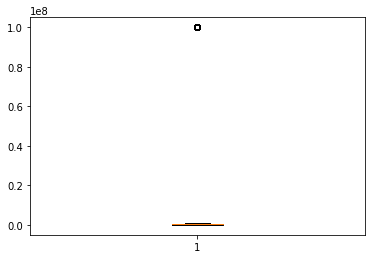

In [40]:
# Percentile distribution and summary statistics
print('Min = ', credit_data['Current Loan Amount'].min())
print('Max = ', credit_data['Current Loan Amount'].max())
print('Mean = ', credit_data['Current Loan Amount'].mean())
print('Median', credit_data['Current Loan Amount'].median())

percentile = credit_data['Current Loan Amount'].quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['Current Loan Amount'].quantile([0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.90])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['Current Loan Amount'])
plt.show()

Findings : 99999999.00 is default value taken by the system. About 12%. 

Action : Create a new category as missing and non missing and mark the default values. Impute the default value with median.

### 9. Credit Score
The credit score of the customer. It determines credit worthiness. Generally it lies between a range of 300 and 950. The range may be different in different countries.

In [41]:
credit_data['Credit Score'].isnull().sum() # 14947
# 14947 Null Values

14947

In [42]:
print(14947*100/82000, '% null values')

18.228048780487804 % null values


In [43]:
# Percentile distribution and summary statistics
print('Min = ', credit_data['Credit Score'].min())
print('Max = ', credit_data['Credit Score'].max())
print('Mean = ', credit_data['Credit Score'].mean())
print('Median', credit_data['Credit Score'].median())

percentile = credit_data['Credit Score'].quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['Credit Score'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))


Min =  585.0
Max =  7510.0
Mean =  1153.8584083994513
Median 730.0
0.00     585.0
0.10     684.0
0.20     704.0
0.25     710.0
0.30     715.0
0.40     723.0
0.50     730.0
0.60     737.0
0.70     741.0
0.75     743.0
0.80     745.0
0.90     749.0
1.00    7510.0
Name: Credit Score, dtype: float64
0.91     750.0
0.92     750.0
0.93     751.0
0.94    6710.0
0.95    6970.0
0.96    7120.0
0.97    7230.0
0.98    7320.0
0.99    7400.0
1.00    7510.0
Name: Credit Score, dtype: float64


It looks like from 94 %ile the values are out of the normal range. However, a more sensible understanding would be that the actual credit score has been multiplied by 10 by mistake. We need to explore further to confirm this.

In [44]:
credit_data['Credit Score'][credit_data['Credit Score']>751].sort_values()

35970    5850.0
57010    5850.0
19257    5860.0
37720    5890.0
19334    5900.0
          ...  
39825    7510.0
74896    7510.0
55663    7510.0
22901    7510.0
36967    7510.0
Name: Credit Score, Length: 4551, dtype: float64

751 seems to be the highest possible correct value. Beyond it all values have been multiplied by 10. 

Action 1 : Divide the values which are greater than 751 by 10. This will give the correct values.

Action 2 : Create a flag variable as missing and non-missing. Impute with median. Performing Action 1  will make the median more accurate.

### 10. Annual Income
Annual income of the customer.

In [45]:
credit_data['Annual Income'].isnull().sum() # 14947
# 14947 Null Values

14947

In [46]:
print(14947*100/82000, '% null values')

18.228048780487804 % null values


In [47]:
# Percentile distribution and summary statistics
print('Min = ', credit_data['Annual Income'].min())
print('Max = ', credit_data['Annual Income'].max())
print('Mean = ', credit_data['Annual Income'].mean())
print('Median', credit_data['Annual Income'].median())

percentile = credit_data['Annual Income'].quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['Annual Income'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))


Min =  76627.0
Max =  165557393.0
Mean =  1376503.1287806479
Median 1170628.0
0.00    7.662700e+04
0.10    6.325157e+05
0.20    7.753520e+05
0.25    8.478608e+05
0.30    9.176145e+05
0.40    1.039984e+06
0.50    1.170628e+06
0.60    1.340241e+06
0.70    1.530296e+06
0.75    1.649257e+06
0.80    1.799992e+06
0.90    2.279316e+06
1.00    1.655574e+08
Name: Annual Income, dtype: float64
0.91    2.334562e+06
0.92    2.423278e+06
0.93    2.521376e+06
0.94    2.659452e+06
0.95    2.806238e+06
0.96    2.959109e+06
0.97    3.253382e+06
0.98    3.709180e+06
0.99    4.552640e+06
1.00    1.655574e+08
Name: Annual Income, dtype: float64


In [48]:
# Detecting the value above which we can consider the rest as outlliers
credit_data['Annual Income'][(credit_data['Annual Income']>3000000.0)].sort_values()

55313      3000480.0
10690      3000670.0
37879      3000955.0
18503      3001354.0
18811      3001544.0
            ...     
58639     24161540.0
9894      28095300.0
30576     30838995.0
37711     36475440.0
54760    165557393.0
Name: Annual Income, Length: 2566, dtype: float64

Findings - We can consider values above 3,000,000 as outliers which constitutes 4% of the values.

Action 1: Impute the high side outliers (values above 3000000) with median.

Action 2: Create a flag variable to highlight outlier + null values. Impute the null values with median.


### 11. Monthly Debt
 Monthly installment on loans. The amount the customer spents in repaying loans every month.

In [49]:
credit_data['Monthly Debt'].isnull().sum() # 0
# No Null Values

0

Min =  0.0
Max =  435843.28
Mean =  18330.633109550115
Median 16075.33
0.00         0.00
0.10      5699.70
0.20      8821.70
0.25     10117.60
0.30     11327.88
0.40     13692.81
0.50     16075.33
0.60     18733.77
0.70     21924.02
0.75     23811.37
0.80     26130.70
0.90     33188.67
1.00    435843.28
Name: Monthly Debt, dtype: float64
0.91     34263.58
0.92     35512.23
0.93     36772.33
0.94     38403.40
0.95     40235.88
0.96     42607.70
0.97     45791.00
0.98     50521.35
0.99     58543.92
1.00    435843.28
Name: Monthly Debt, dtype: float64


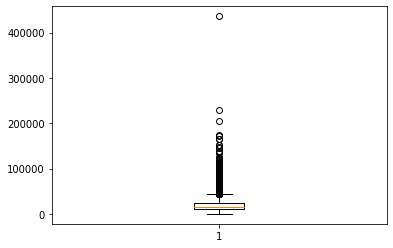

In [50]:
# Percentile distribution and summary statistics
print('Min = ', credit_data['Monthly Debt'].min())
print('Max = ', credit_data['Monthly Debt'].max())
print('Mean = ', credit_data['Monthly Debt'].mean())
print('Median', credit_data['Monthly Debt'].median())

percentile = credit_data['Monthly Debt'].quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['Monthly Debt'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['Monthly Debt'])
plt.show()


In [51]:
# Investigating the high side outliers

debt = credit_data['Monthly Debt'][credit_data['Monthly Debt'] > 58543.92]
percentile = debt.quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

0.00     58552.49
0.10     59909.98
0.20     61574.86
0.25     62247.99
0.30     63175.59
0.40     65403.21
0.50     67592.02
0.60     70567.71
0.70     74080.43
0.75     76957.98
0.80     80437.07
0.90     93899.22
1.00    435843.28
Name: Monthly Debt, dtype: float64


Findings : Consider values above 70000 as outliers. Impute with median. Rest all are fine.

### 12. Years of Credit History
How old is the credit history of the customer. The time in years since the customer got a credit line approved by a financial institution for the first time.

In [52]:
credit_data['Years of Credit History'].isnull().sum() # 0
# No Null Values

0

Min =  3.6
Max =  70.5
Mean =  18.29678288759619
Median 17.0
0.00     3.6
0.10    10.5
0.20    12.7
0.25    13.5
0.30    14.3
0.40    15.7
0.50    17.0
0.60    18.6
0.70    20.6
0.75    21.8
0.80    23.1
0.90    27.9
1.00    70.5
Name: Years of Credit History, dtype: float64
0.91    28.5
0.92    29.1
0.93    30.0
0.94    30.9
0.95    31.8
0.96    33.0
0.97    34.5
0.98    37.1
0.99    40.4
1.00    70.5
Name: Years of Credit History, dtype: float64


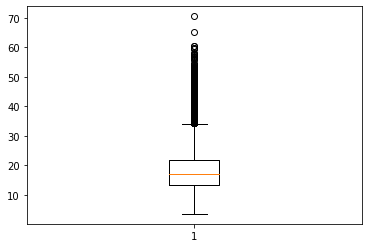

In [53]:
# Percentile distribution and summary statistics
print('Min = ', credit_data['Years of Credit History'].min())
print('Max = ', credit_data['Years of Credit History'].max())
print('Mean = ', credit_data['Years of Credit History'].mean())
print('Median', credit_data['Years of Credit History'].median())

percentile = credit_data['Years of Credit History'].quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['Years of Credit History'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['Years of Credit History'])
plt.show()


In [54]:
# Investigating the high side outliers

credit_data['Years of Credit History'][(credit_data['Years of Credit History'] > 45)].sort_values()

60523    45.1
91628    45.1
35919    45.1
73960    45.2
23698    45.2
         ... 
70659    59.9
65242    60.5
79537    60.5
32585    65.0
17879    70.5
Name: Years of Credit History, Length: 298, dtype: float64

Findings : Since the distribution seems normal even in the top 1 %ile of values and the highest credit history of 70.5 years is practically possible, we can consider that there are no outliers. Data is clean.

### 13. Months since last delinquent
Number of months since the customer since the customer was last reported as delinquent. In other words, the number of months since which the customer moved from delinquent to non-delinquent, hand has been regular in payments.

In [55]:
credit_data['Months since last delinquent'].isnull().sum() # 44621
print(44621*100/82000, '% Null values')

54.415853658536584 % Null values


In [56]:
available = credit_data['Months since last delinquent'][credit_data['Months since last delinquent'].isnull()==False]
percentile = available.quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

0.00      0.0
0.10      8.0
0.20     14.0
0.25     16.0
0.30     19.0
0.40     25.0
0.50     32.0
0.60     39.0
0.70     47.0
0.75     51.0
0.80     57.0
0.90     69.0
1.00    176.0
Name: Months since last delinquent, dtype: float64


In [57]:
percentile = available.quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile, 2))

0.91     70.0
0.92     71.0
0.93     72.0
0.94     74.0
0.95     75.0
0.96     76.0
0.97     78.0
0.98     79.0
0.99     81.0
1.00    176.0
Name: Months since last delinquent, dtype: float64


Findings : Percentage of null values is greater than 50%. There are no outliers in available values. We cannot use this data in model building. So we will exclude this data.

Action : Create a flag of missing and non-missing and mark the null values.

### 14. Number of Open Accounts
Number of open loan accounts showing in the credit report/history.

In [58]:
credit_data['Number of Open Accounts'].isnull().sum() # 0
# No Null Values

0

Min =  0.0
Max =  76.0
Mean =  11.114489201087817
Median 10.0
0.00     0.0
0.10     6.0
0.20     7.0
0.25     8.0
0.30     8.0
0.40     9.0
0.50    10.0
0.60    11.0
0.70    13.0
0.75    14.0
0.80    15.0
0.90    18.0
1.00    76.0
Name: Number of Open Accounts, dtype: float64
0.91    18.0
0.92    19.0
0.93    19.0
0.94    20.0
0.95    20.0
0.96    21.0
0.97    22.0
0.98    24.0
0.99    27.0
1.00    76.0
Name: Number of Open Accounts, dtype: float64


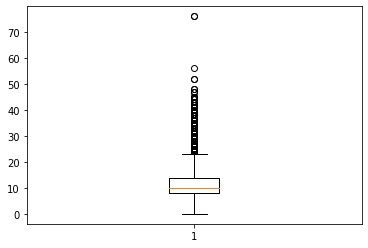

In [59]:
# Percentile distribution and summary statistics
print('Min = ', credit_data['Number of Open Accounts'].min())
print('Max = ', credit_data['Number of Open Accounts'].max())
print('Mean = ', credit_data['Number of Open Accounts'].mean())
print('Median', credit_data['Number of Open Accounts'].median())

percentile = credit_data['Number of Open Accounts'].quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['Number of Open Accounts'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['Number of Open Accounts'])
plt.show()

In [60]:
# Investigating the high side outliers

credit_data['Number of Open Accounts'][(credit_data['Number of Open Accounts'] > 30)].sort_values()
credit_data['Number of Open Accounts'][(credit_data['Number of Open Accounts'] > 30)].value_counts().sum()

300

Findings : Taking 30 as the maximum number of open loan accounts, we have 300 outliers. Since it is less than 1%, we can impute with the median.

### 15. Number of Credit Problems
Number of times some issue regarding delinquency in repayment was reported.

In [61]:
credit_data['Number of Credit Problems'].isnull().sum() # 0
# No Null Values

0

In [62]:
# Discrete variable
credit_data['Number of Credit Problems'].value_counts()

0.0     70990
1.0      9539
2.0      1014
3.0       293
4.0        95
5.0        40
6.0        13
7.0         6
8.0         2
9.0         2
10.0        2
15.0        1
12.0        1
11.0        1
Name: Number of Credit Problems, dtype: int64

Findings : No issues. Data is clean.

### 16. Current Credit Balance

In [63]:
credit_data['Current Credit Balance'].isnull().sum() # 0
# No Null Values

0

Min =  0.0
Max =  32878968.0
Mean =  293620.31336967525
Median 209931.0
0.00           0.0
0.10       57551.0
0.20       95855.0
0.25      113316.0
0.30      130860.6
0.40      167960.0
0.50      209931.0
0.60      260106.2
0.70      325006.4
0.75      366994.5
0.80      419083.0
0.90      587065.8
1.00    32878968.0
Name: Current Credit Balance, dtype: float64
0.91      613022.84
0.92      641129.16
0.93      674120.00
0.94      713262.28
0.95      759855.60
0.96      827666.60
0.97      923714.26
0.98     1102270.56
0.99     1539760.76
1.00    32878968.00
Name: Current Credit Balance, dtype: float64


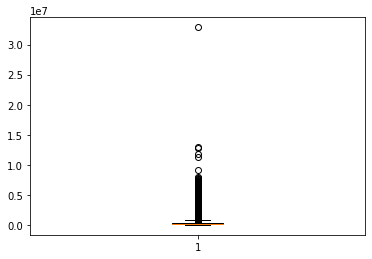

In [64]:
# Percentile distribution and summary statistics
print('Min = ', credit_data['Current Credit Balance'].min())
print('Max = ', credit_data['Current Credit Balance'].max())
print('Mean = ', credit_data['Current Credit Balance'].mean())
print('Median', credit_data['Current Credit Balance'].median())

percentile = credit_data['Current Credit Balance'].quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['Current Credit Balance'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['Current Credit Balance'])
plt.show()

In [65]:
# Investigating the high side outliers

credit_data['Current Credit Balance'][(credit_data['Current Credit Balance'] > 1000000)].sort_values()

33071     1000122.0
54868     1000198.0
92557     1000540.0
41270     1000559.0
56147     1000654.0
            ...    
62699    11361924.0
46840    11796435.0
36510    12746397.0
69161    12986956.0
68665    32878968.0
Name: Current Credit Balance, Length: 2027, dtype: float64

In [66]:
curr_cred = credit_data['Current Credit Balance'][(credit_data['Current Credit Balance'] > 1000000)]

percentile = curr_cred.quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

0.00     1000122.0
0.10     1046945.6
0.20     1108604.4
0.25     1149300.5
0.30     1183187.0
0.40     1270218.4
0.50     1385062.0
0.60     1545038.2
0.70     1781086.6
0.75     1927645.0
0.80     2115361.2
0.90     2836593.6
1.00    32878968.0
Name: Current Credit Balance, dtype: float64


In [67]:
curr_cred = credit_data['Current Credit Balance'][(credit_data['Current Credit Balance'] > 2115360)].sort_values()
percentile = curr_cred.quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

0.00     2115517.00
0.10     2200941.00
0.20     2309716.00
0.25     2354883.75
0.30     2429473.00
0.40     2611835.00
0.50     2836947.00
0.60     3240374.00
0.70     3832585.00
0.75     4063753.25
0.80     4367245.00
0.90     5742560.00
1.00    32878968.00
Name: Current Credit Balance, dtype: float64


In [68]:
credit_data['Current Credit Balance'][(credit_data['Current Credit Balance'] > 3000000.00)].sort_values()

82701     3014255.0
54738     3024344.0
84902     3029702.0
25301     3052103.0
47847     3058012.0
            ...    
62699    11361924.0
46840    11796435.0
36510    12746397.0
69161    12986956.0
68665    32878968.0
Name: Current Credit Balance, Length: 183, dtype: float64

Findings : After drilling down multiple levels, we are considering 3000000 as the threshold value. The rest 183 values above this can be considered outliers as the gap between these data points keeps on increasing.

Action : Impute these 183 values with the median.

### 17. Maximum Open Credit
The maximum amount of open credit the customer has had since a credit line was assigned to them.

In [69]:
credit_data['Maximum Open Credit'].isnull().sum() # 2
# 2 Null Values

2

In [70]:
# Percentile distribution and summary statistics
print('Min = ', credit_data['Maximum Open Credit'].min())
print('Max = ', credit_data['Maximum Open Credit'].max())
print('Mean = ', credit_data['Maximum Open Credit'].mean())
print('Median', credit_data['Maximum Open Credit'].median())

percentile = credit_data['Maximum Open Credit'].quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['Maximum Open Credit'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

Min =  0.0
Max =  1539737892.0
Mean =  793535.8144810176
Median 477774.0
0.00    0.000000e+00
0.10    1.651584e+05
0.20    2.436940e+05
0.25    2.804560e+05
0.30    3.162940e+05
0.40    3.916880e+05
0.50    4.777740e+05
0.60    5.821420e+05
0.70    7.150484e+05
0.75    7.984900e+05
0.80    9.038612e+05
0.90    1.252526e+06
1.00    1.539738e+09
Name: Maximum Open Credit, dtype: float64
0.91    1.308364e+06
0.92    1.378570e+06
0.93    1.457041e+06
0.94    1.554645e+06
0.95    1.679955e+06
0.96    1.847343e+06
0.97    2.103455e+06
0.98    2.518562e+06
0.99    3.728199e+06
1.00    1.539738e+09
Name: Maximum Open Credit, dtype: float64


In [71]:
# Need to explore 97 %ile onwards
open_cred = credit_data['Maximum Open Credit'][(credit_data['Maximum Open Credit'] > 2103455)]
percentile = open_cred.quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

0.00    2.103552e+06
0.10    2.200711e+06
0.20    2.318127e+06
0.25    2.393430e+06
0.30    2.467782e+06
0.40    2.643071e+06
0.50    2.933711e+06
0.60    3.322013e+06
0.70    3.998526e+06
0.75    4.666074e+06
0.80    5.393573e+06
0.90    9.135458e+06
1.00    1.539738e+09
Name: Maximum Open Credit, dtype: float64


In [72]:
open_cred = credit_data['Maximum Open Credit'][(credit_data['Maximum Open Credit'] > 3322013)]
percentile = open_cred.quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

0.00    3.322924e+06
0.10    3.548261e+06
0.20    3.831912e+06
0.25    3.999556e+06
0.30    4.217250e+06
0.40    4.758842e+06
0.50    5.394246e+06
0.60    6.357683e+06
0.70    7.854084e+06
0.75    9.140774e+06
0.80    1.085406e+07
0.90    1.738373e+07
1.00    1.539738e+09
Name: Maximum Open Credit, dtype: float64


In [73]:
credit_data['Maximum Open Credit'][(credit_data['Maximum Open Credit'] > 4000000.00)].sort_values()

80451    4.000128e+06
33420    4.003626e+06
27726    4.005166e+06
89803    4.008510e+06
20651    4.009038e+06
             ...     
89506    6.324777e+08
9156     7.982554e+08
99417    9.803053e+08
98728    1.304726e+09
76405    1.539738e+09
Name: Maximum Open Credit, Length: 738, dtype: float64

Findings : Condiering 4,000,000 as the threshold value above which we can consider all values as outliers. So these 738 points can be considered as outliers. 

Action : It is less than 1%. So impute with median.

### 18. Bankruptcies
Number of times a customer has gone bankrupt.

In [74]:
credit_data['Bankruptcies'].isnull().sum() # 175
# 175 Null Values

175

In [75]:
# Discrete Data
credit_data['Bankruptcies'].value_counts()

0.0    73101
1.0     8296
2.0      329
3.0       72
4.0       19
5.0        5
7.0        1
6.0        1
Name: Bankruptcies, dtype: int64

Findings : 175 null values which is less than 1%. Impute the null values with median.

### 19. Tax Liens
Number of times a tax lien has been marked against the customer for failing to pay taxes.

A tax lien is a legal claim against the assets of an individual or business that fails to pay taxes owed to the government.

In [76]:
credit_data['Tax Liens'].isnull().sum() # 8
# 8 null values

8

In [77]:
# Discrete data
credit_data['Tax Liens'].value_counts()

0.0     80491
1.0      1040
2.0       286
3.0        93
4.0        47
5.0        14
6.0         9
7.0         5
9.0         3
15.0        1
11.0        1
10.0        1
Name: Tax Liens, dtype: int64

Findings : Impute the 8 null values with median.

# DATA CLEANING

## Categorical Variables Cleaning

### Years in current job

In [78]:
import warnings
warnings.filterwarnings("ignore")

In [79]:
credit_data['Years in current job'][credit_data['Years in current job'].isnull()==True] = 'Null'
credit_data['Years in current job'].value_counts()

10+ years    25271
2 years       7560
< 1 year      6755
3 years       6671
5 years       5619
1 year        5317
4 years       5029
6 years       4702
7 years       4566
8 years       3781
Null          3508
9 years       3220
Name: Years in current job, dtype: int64

In [80]:
crosstab = pd.crosstab(credit_data['Years in current job'], credit_data['Loan Status'])
crosstab
crosstab_perc = crosstab.apply(lambda x: x/x.sum(), axis=1)
round(crosstab_perc, 2)

Loan Status,Charged Off,Fully Paid
Years in current job,,
1 year,0.28,0.72
10+ years,0.27,0.73
2 years,0.26,0.74
3 years,0.26,0.74
4 years,0.27,0.73
5 years,0.27,0.73
6 years,0.28,0.72
7 years,0.28,0.72
8 years,0.28,0.72


In [81]:
# Reset the index
credit_data = credit_data.reset_index(drop=True)
credit_data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,null_count
0,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526.0,Short Term,716.0,2065965.0,10+ years,Home Mortgage,Home Improvements,49927.44,15.1,5.0,22.0,0.0,526414.0,1090386.0,0.0,0.0,0
1,000a0abe-b839-414d-9b00-8ba33b47ebce,b2f4c91c-0157-4529-af67-35ffeac65389,Fully Paid,77176.0,Short Term,736.0,1618629.0,10+ years,Home Mortgage,Other,7229.88,28.6,2.0,6.0,0.0,221217.0,560472.0,0.0,0.0,0
2,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,Charged Off,142186.0,Short Term,7320.0,479712.0,1 year,Own Home,Debt Consolidation,12032.51,19.9,74.0,9.0,0.0,152475.0,534974.0,0.0,0.0,0
3,000dada0-f2a3-4d6d-b9d2-284939e7cc7d,f7f2f882-1904-4002-8121-9be4ee9143de,Fully Paid,99999999.0,Short Term,740.0,1599629.0,2 years,Rent,Debt Consolidation,22661.49,21.1,16.0,22.0,0.0,226556.0,406076.0,0.0,0.0,0
4,0010c319-7142-47c3-8a68-57e45f54c000,bd2528b4-9602-48f2-9559-a12dcdb72f48,Charged Off,325688.0,Short Term,744.0,1181325.0,1 year,Rent,Debt Consolidation,18507.33,12.9,38.0,10.0,0.0,194617.0,338888.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81994,fda107a5-8d70-4131-9005-12fc53dc432f,c9b119d1-7f7e-491d-a187-98ca88b2cb11,Fully Paid,509036.0,Short Term,NaN,NaN,Null,Home Mortgage,Debt Consolidation,10120.92,16.4,NaN,7.0,1.0,458166.0,1026124.0,1.0,0.0,4
81995,fe1b194b-9e7e-4594-9ba5-df6574ea0f39,7aa4c3f0-f7ba-4ba1-a8dc-2af941f48f33,Charged Off,784564.0,Long Term,NaN,NaN,Null,Home Mortgage,Debt Consolidation,32829.72,32.7,NaN,10.0,0.0,336395.0,785312.0,0.0,0.0,4
81996,feada61e-04cf-4370-bb37-2d15e2e8665d,595064e3-4618-4841-b98b-0cb47af71241,Charged Off,398178.0,Long Term,NaN,NaN,Null,Home Mortgage,Debt Consolidation,32475.75,15.5,NaN,11.0,0.0,485545.0,871640.0,0.0,0.0,4
81997,feae7ab6-8af5-4e0f-a732-9900d3d5ca56,6d87a641-64ac-475c-ac0f-3bf9890d4828,Charged Off,108922.0,Short Term,NaN,NaN,Null,Rent,Debt Consolidation,14273.18,11.3,NaN,4.0,2.0,82175.0,130702.0,1.0,1.0,4


In [82]:
# Put 2000 records into 10+ years, 750 into 9 years and remaining 758 into 8 years

index_list = credit_data[credit_data['Years in current job']=='Null'].index.tolist()
print(len(index_list))
ind2000 = index_list[0 : 2000]

print(len(ind2000))
print(min(ind2000))
print(max(ind2000))

3508
2000
29495
68934


In [83]:
credit_data['Years in current job'].iloc[ind2000] = '10+ years'

In [84]:
credit_data['Years in current job'].value_counts()

10+ years    27271
2 years       7560
< 1 year      6755
3 years       6671
5 years       5619
1 year        5317
4 years       5029
6 years       4702
7 years       4566
8 years       3781
9 years       3220
Null          1508
Name: Years in current job, dtype: int64

In [85]:
# 750 records into 9 years and remaining into 8 years

index_list = credit_data[credit_data['Years in current job']=='Null'].index.tolist()
print(len(index_list))
ind = index_list[0 : 750]

1508


In [86]:
credit_data['Years in current job'].iloc[ind] = '9 years'
credit_data['Years in current job'][credit_data['Years in current job']=='Null'] = '8 years'
credit_data['Years in current job'].value_counts()

10+ years    27271
2 years       7560
< 1 year      6755
3 years       6671
5 years       5619
1 year        5317
4 years       5029
6 years       4702
7 years       4566
8 years       4539
9 years       3970
Name: Years in current job, dtype: int64

### Home Ownership

In [87]:
credit_data['Home Ownership'][credit_data['Home Ownership']=='HaveMortgage'] = 'Home Mortgage'
credit_data['Home Ownership'].value_counts()

Home Mortgage    40042
Rent             34499
Own Home          7458
Name: Home Ownership, dtype: int64

### Purpose

In [88]:
credit_data['Purpose'][credit_data['Purpose']=='other'] = 'Other'
credit_data['Purpose'].value_counts()

Debt Consolidation      64907
Other                    7238
Home Improvements        4795
Business Loan            1229
Buy a Car                1081
Medical Bills             880
Buy House                 519
Take a Trip               435
major_purchase            303
small_business            230
moving                    116
wedding                    93
Educational Expenses       85
vacation                   80
renewable_energy            8
Name: Purpose, dtype: int64

### Current Loan Amount

In [89]:
# Flag variable : Available = 1, Missing/Default = 0
credit_data['curr_loan_amt_flag'] = 1
credit_data['curr_loan_amt_flag'][credit_data['Current Loan Amount']==99999999.0] = 0

print(credit_data['curr_loan_amt_flag'].value_counts())
print(credit_data['Current Loan Amount'][credit_data['Current Loan Amount']==99999999.0].shape)

1    72311
0     9688
Name: curr_loan_amt_flag, dtype: int64
(9688,)


0.00     10802.0
0.10    109423.6
0.20    157102.0
0.25    179256.0
0.30    212374.8
0.40    248758.4
0.50    307780.0
0.60    307780.0
0.70    350350.0
0.75    396077.0
0.80    438284.0
0.90    549960.4
1.00    789250.0
Name: Current Loan Amount, dtype: float64


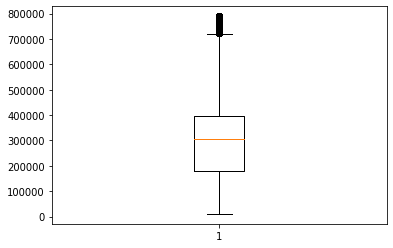

In [90]:
# Impute default values with median
credit_data['Current Loan Amount'][credit_data['Current Loan Amount']==99999999.0] = credit_data['Current Loan Amount'].median()

percentile = credit_data['Current Loan Amount'].quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

plt.boxplot(credit_data['Current Loan Amount'])
plt.show()

### Credit Score

In [91]:
# Actipn 1 : Divide values > 751 by 10
credit_data['Credit Score'][credit_data['Credit Score']>751] = credit_data['Credit Score']/10
credit_data['Credit Score'][credit_data['Credit Score'].isnull()==False].sort_values()

46915    585.0
2312     585.0
29116    585.0
7927     585.0
60886    585.0
         ...  
46918    751.0
40351    751.0
5626     751.0
20129    751.0
42512    751.0
Name: Credit Score, Length: 67052, dtype: float64

In [92]:
# Action 2 : Create a flag variable : Available = 1, Missing = 0
credit_data['credit_score_flag'] = 1
credit_data['credit_score_flag'][credit_data['Credit Score'].isnull()] = 0

print(credit_data['credit_score_flag'].value_counts())
print(credit_data['Credit Score'].isnull().sum())

1    67052
0    14947
Name: credit_score_flag, dtype: int64
14947


0.00    585.0
0.10    687.0
0.20    707.0
0.25    713.0
0.30    718.0
0.40    727.0
0.50    727.0
0.60    728.0
0.70    735.0
0.75    738.0
0.80    741.0
0.90    745.0
1.00    751.0
Name: Credit Score, dtype: float64


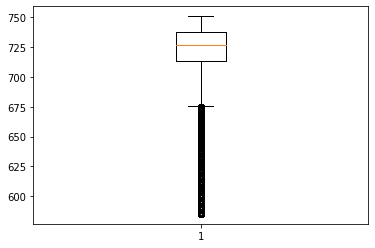

In [93]:
# Impute null values with median
credit_data['Credit Score'][credit_data['Credit Score'].isnull()] = credit_data['Credit Score'].median()

percentile = credit_data['Credit Score'].quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

plt.boxplot(credit_data['Credit Score'])
plt.show()

### Annual Income

In [94]:
# Create a flag variable : Available = 1, Missing + Outliers = 0
credit_data['income_flag'] = 1
credit_data['income_flag'][credit_data['Annual Income'].isnull()] = 0
credit_data['income_flag'][credit_data['Annual Income'] > 3000000] = 0

print(credit_data['income_flag'].value_counts())
print(credit_data['Annual Income'][(credit_data['Annual Income'].isnull()) | (credit_data['Annual Income'] > 3000000)].shape)

1    64486
0    17513
Name: income_flag, dtype: int64
(17513,)


In [95]:
# Impute values > 3000000 with median
credit_data['Annual Income'][credit_data['Annual Income'] > 3000000] = credit_data['Annual Income'].median()

0.00      76627.0
0.10     669024.2
0.20     841715.2
0.25     927504.0
0.30     991465.6
0.40    1158924.0
0.50    1170609.0
0.60    1170628.0
0.70    1332793.0
0.75    1439402.0
0.80    1567952.2
0.90    1929868.0
1.00    2999264.0
Name: Annual Income, dtype: float64


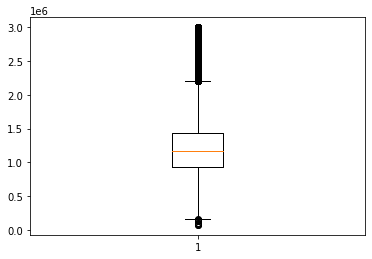

In [96]:
# Impute null values with median
credit_data['Annual Income'][credit_data['Annual Income'].isnull()] = credit_data['Annual Income'].median()

percentile = credit_data['Annual Income'].quantile([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])
print(round(percentile, 2))

plt.boxplot(credit_data['Annual Income'])
plt.show()

In [97]:
credit_data['Annual Income'].median()

1170609.0


### Monthly Debt 

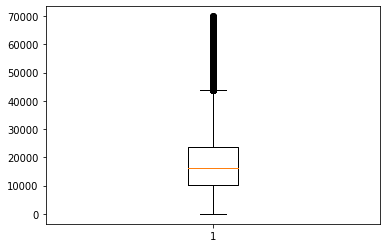

In [98]:
### Impute high side outliers with median
credit_data['Monthly Debt'][credit_data['Monthly Debt'] > 70000] = credit_data['Monthly Debt'].median()

plt.boxplot(credit_data['Monthly Debt'])
plt.show()

### Months since last delinquent

In [99]:
# Create a flag variable : Available = 1, Missing = 0
credit_data['delin_month_flag'] = 1
credit_data['delin_month_flag'][credit_data['Months since last delinquent'].isnull()] = 0

print(credit_data['delin_month_flag'].value_counts())
print(credit_data['Months since last delinquent'][credit_data['Months since last delinquent'].isnull()].shape)

0    44621
1    37378
Name: delin_month_flag, dtype: int64
(44621,)


### Number of Open Accounts

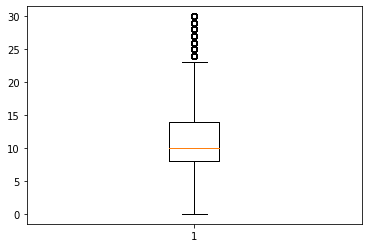

In [100]:
# Impute values > 30 with median
credit_data['Number of Open Accounts'][credit_data['Number of Open Accounts'] > 30] = credit_data['Number of Open Accounts'].median()

plt.boxplot(credit_data['Number of Open Accounts'])
plt.show()

### Current Credit Balance

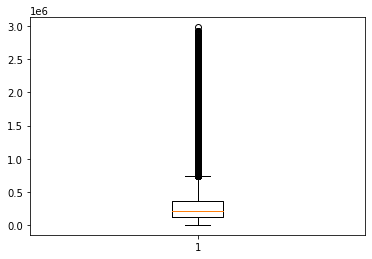

In [101]:
# impute values > 3,000,000 with median
credit_data['Current Credit Balance'][(credit_data['Current Credit Balance'] > 3000000.00)] = credit_data['Current Credit Balance'].median()

plt.boxplot(credit_data['Current Credit Balance'])
plt.show()

### Maximum Open Credit

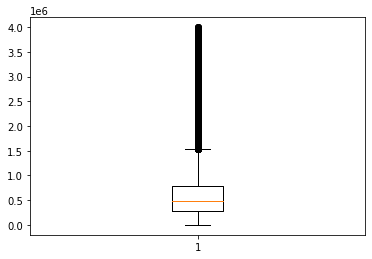

In [102]:
# Impute null values and values greater than 4,000,000 with median
credit_data['Maximum Open Credit'][(credit_data['Maximum Open Credit'] > 4000000) | (credit_data['Maximum Open Credit'].isnull())] = credit_data['Maximum Open Credit'].median()

plt.boxplot(credit_data['Maximum Open Credit'])
plt.show()

### Bankruptcies

In [103]:
# Impute the null values with median
credit_data['Bankruptcies'][credit_data['Bankruptcies'].isnull()] = credit_data['Bankruptcies'].median()

credit_data['Bankruptcies'].isnull().sum()

0

### Tax Liens

In [104]:
# Impute null values with median
credit_data['Tax Liens'][credit_data['Tax Liens'].isnull()]=credit_data['Tax Liens'].median()
credit_data['Tax Liens'].isnull().sum()

0

## Feature Engineering

### Labelling and Binary encoding

In [105]:
cred_data = credit_data.copy() # Keeping a copy before feature engineering

In [106]:
# Term : Binary encoding (0, 1)

print(credit_data["Term"].value_counts())

credit_data['Term'].replace(['Short Term','Long Term'], [0,1], inplace=True)
credit_data["Term"].value_counts()

Short Term    61387
Long Term     20612
Name: Term, dtype: int64


0    61387
1    20612
Name: Term, dtype: int64

In [107]:
# Years in current job : Labelling

print(credit_data["Years in current job"].value_counts())

credit_data['Years in current job'].replace(['10+ years','2 years','< 1 year','3 years','5 years','1 year','4 years',
                                             '6 years','7 years','8 years','9 years'], [11,2,0,3,5,1,4,6,7,8,9], inplace=True)
print(credit_data["Years in current job"].value_counts())

10+ years    27271
2 years       7560
< 1 year      6755
3 years       6671
5 years       5619
1 year        5317
4 years       5029
6 years       4702
7 years       4566
8 years       4539
9 years       3970
Name: Years in current job, dtype: int64
11    27271
2      7560
0      6755
3      6671
5      5619
1      5317
4      5029
6      4702
7      4566
8      4539
9      3970
Name: Years in current job, dtype: int64


In [108]:
# Loan Status : Binary encoding (0, 1)
print(credit_data['Loan Status'].value_counts())

credit_data['Loan Status'].replace(['Fully Paid','Charged Off'], [0,1], inplace=True)
print(credit_data['Loan Status'].value_counts())

Fully Paid     59360
Charged Off    22639
Name: Loan Status, dtype: int64
0    59360
1    22639
Name: Loan Status, dtype: int64


In [109]:
# We are keeping null_count column as a part of feature engineering. 
# It shows how many variables were missing initially for each record.

### Renaming all variables to appropriate conventional names

In [110]:
credit_data.rename(columns = {'Loan ID':'loan_id', 'Customer ID':'cust_id', 'Loan Status':'status_y', 'Current Loan Amount':'loan_amt', 
                              'Term':'term', 'Credit Score':'cred_score', 'Annual Income':'income', 'Years in current job':'job_years', 
                              'Home Ownership':'home', 'Purpose':'purpose', 'Monthly Debt':'emi', 'Years of Credit History':'cred_years', 
                              'Months since last delinquent':'delin_mon', 'Number of Open Accounts':'open_acc', 
                              'Number of Credit Problems':'cred_prob', 'Current Credit Balance':'curr_bal', 'Maximum Open Credit':'max_cred', 
                              'Bankruptcies':'bankrupt', 'Tax Liens':'tax_lien'}, inplace=True)

In [111]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81999 entries, 0 to 81998
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             81999 non-null  object 
 1   cust_id             81999 non-null  object 
 2   status_y            81999 non-null  int64  
 3   loan_amt            81999 non-null  float64
 4   term                81999 non-null  int64  
 5   cred_score          81999 non-null  float64
 6   income              81999 non-null  float64
 7   job_years           81999 non-null  int64  
 8   home                81999 non-null  object 
 9   purpose             81999 non-null  object 
 10  emi                 81999 non-null  float64
 11  cred_years          81999 non-null  float64
 12  delin_mon           37378 non-null  float64
 13  open_acc            81999 non-null  float64
 14  cred_prob           81999 non-null  float64
 15  curr_bal            81999 non-null  float64
 16  max_

### Loan ID and Customer ID
We may not need Loan ID and Customer ID because it will really not make much impact on the target. Every value is unique. So, we can drop them when building models.

But, if we keep them to preserve customer information then we have to convert them into unique numbers. 

In [112]:
credit_data['loan_num'] = np.arange(len(credit_data))
credit_data['cust_num'] = np.arange(len(credit_data))
credit_data[['loan_num','cust_num']]

,loan_num,cust_num
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
81994,81994,81994
81995,81995,81995
81996,81996,81996
81997,81997,81997


### One hot encoding

In [113]:
# credit_data['home'] value renaming
credit_data['home'].value_counts()

credit_data['home'].replace(['Home Mortgage','Rent','Own Home'], ['home_mortgage','home_rent','home_owned'], inplace=True)
credit_data['home'].value_counts()

home_mortgage    40042
home_rent        34499
home_owned        7458
Name: home, dtype: int64

In [114]:
# credit_data['purpose'] value renaming
print(credit_data['purpose'].value_counts())

credit_data['purpose'].replace(['Debt Consolidation','Home Improvements','Business Loan','Buy a Car','Medical Bills','Buy House',
                                'Take a Trip','Educational Expenses','renewable_energy'], 
                               ['purp_debt','purp_home','purp_business', 'purp_car', 'purp_medical', 'purp_buy_house', 'purp_trip', 
                                'purp_edu', 'purp_renew_en'], inplace=True)
credit_data['purpose'].value_counts()

Debt Consolidation      64907
Other                    7238
Home Improvements        4795
Business Loan            1229
Buy a Car                1081
Medical Bills             880
Buy House                 519
Take a Trip               435
major_purchase            303
small_business            230
moving                    116
wedding                    93
Educational Expenses       85
vacation                   80
renewable_energy            8
Name: purpose, dtype: int64


purp_debt         64907
Other              7238
purp_home          4795
purp_business      1229
purp_car           1081
purp_medical        880
purp_buy_house      519
purp_trip           435
major_purchase      303
small_business      230
moving              116
wedding              93
purp_edu             85
vacation             80
purp_renew_en         8
Name: purpose, dtype: int64

In [115]:
onehot_cols = ['home', 'purpose']

# get dummy variables
for col in onehot_cols:
 one_hot_data = pd.get_dummies(credit_data[col])
 credit_data = pd.concat([credit_data, one_hot_data],axis=1)
print("One hot encoded credit data \n", credit_data)
print(credit_data.columns)

One hot encoded credit data 
                                     loan_id  \
0      00069ff1-a877-4d35-81be-7cd359b99956   
1      000a0abe-b839-414d-9b00-8ba33b47ebce   
2      000c0c27-1961-4336-b760-a300e1bce9b0   
3      000dada0-f2a3-4d6d-b9d2-284939e7cc7d   
4      0010c319-7142-47c3-8a68-57e45f54c000   
...                                     ...   
81994  fda107a5-8d70-4131-9005-12fc53dc432f   
81995  fe1b194b-9e7e-4594-9ba5-df6574ea0f39   
81996  feada61e-04cf-4370-bb37-2d15e2e8665d   
81997  feae7ab6-8af5-4e0f-a732-9900d3d5ca56   
81998  8d5a40cc-230c-45f8-91f1-3c3afa7bb97f   

                                    cust_id  status_y  loan_amt  term  \
0      ee3c27f2-766a-499c-9a96-d17c4d2faa16         0   31526.0     0   
1      b2f4c91c-0157-4529-af67-35ffeac65389         0   77176.0     0   
2      881edf98-387c-4eef-ab71-317a7a5e70c1         1  142186.0     0   
3      f7f2f882-1904-4002-8121-9be4ee9143de         0  307780.0     0   
4      bd2528b4-9602-48f2-9559-a12dcdb72

### Infinite VIF variable handling : Multicollinearity check

When we perform one hot encoding on a variable, then all the new columns created are linearly dependent on each other. The sum of their values row-wise is always equal to 1. Therefore, all the new columns are perfectly colliear. Hence, VIF for each of these new columns will be Infinite. 

To avoid infinite VIF we have to drop one of the new columns for each variable on which one-hot-encoding was done. 

In [116]:
cred_data1 = credit_data.drop(['loan_id','cust_id','delin_mon','home','purpose'], axis=1)
cred_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81999 entries, 0 to 81998
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status_y            81999 non-null  int64  
 1   loan_amt            81999 non-null  float64
 2   term                81999 non-null  int64  
 3   cred_score          81999 non-null  float64
 4   income              81999 non-null  float64
 5   job_years           81999 non-null  int64  
 6   emi                 81999 non-null  float64
 7   cred_years          81999 non-null  float64
 8   open_acc            81999 non-null  float64
 9   cred_prob           81999 non-null  float64
 10  curr_bal            81999 non-null  float64
 11  max_cred            81999 non-null  float64
 12  bankrupt            81999 non-null  float64
 13  tax_lien            81999 non-null  float64
 14  null_count          81999 non-null  int64  
 15  curr_loan_amt_flag  81999 non-null  int64  
 16  cred

In [117]:
# Infinite VIF check
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        #print(xvar_names[i])
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

vif_cal(input_data = cred_data1, dependent_col='status_y')

loan_amt  VIF =  1.64
term  VIF =  1.45
cred_score  VIF =  1.42
income  VIF =  1.52
job_years  VIF =  1.14
emi  VIF =  1.89
cred_years  VIF =  1.23
open_acc  VIF =  1.38
cred_prob  VIF =  7.76
curr_bal  VIF =  2.18
max_cred  VIF =  2.25
bankrupt  VIF =  5.12
tax_lien  VIF =  3.35
null_count  VIF =  27.66
curr_loan_amt_flag  VIF =  1.06
credit_score_flag  VIF =  21.81
income_flag  VIF =  6.45
delin_month_flag  VIF =  7.42
loan_num  VIF =  inf
cust_num  VIF =  inf
home_mortgage  VIF =  inf
home_owned  VIF =  inf
home_rent  VIF =  inf
Other  VIF =  inf
major_purchase  VIF =  inf
moving  VIF =  inf
purp_business  VIF =  inf
purp_buy_house  VIF =  inf
purp_car  VIF =  inf
purp_debt  VIF =  inf
purp_edu  VIF =  inf
purp_home  VIF =  inf
purp_medical  VIF =  inf
purp_renew_en  VIF =  inf
purp_trip  VIF =  inf
small_business  VIF =  inf
vacation  VIF =  inf
wedding  VIF =  inf


In [118]:
# Drop home_mortgage, Other, loan_num
# loan_num = cust_num : so it has to be dropped
cred_data1.drop(['home_mortgage','Other','loan_num'], axis=1, inplace = True)

In [119]:
cred_data1.shape

(81999, 36)

In [120]:
# Infinite VIF check
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        #print(xvar_names[i])
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

vif_cal(input_data = cred_data1, dependent_col='status_y')

loan_amt  VIF =  1.64
term  VIF =  1.45
cred_score  VIF =  1.42
income  VIF =  1.52
job_years  VIF =  1.14
emi  VIF =  1.89
cred_years  VIF =  1.23
open_acc  VIF =  1.38
cred_prob  VIF =  7.76
curr_bal  VIF =  2.18
max_cred  VIF =  2.25
bankrupt  VIF =  5.12
tax_lien  VIF =  3.35
null_count  VIF =  27.66
curr_loan_amt_flag  VIF =  1.06
credit_score_flag  VIF =  21.81
income_flag  VIF =  6.45
delin_month_flag  VIF =  7.42
cust_num  VIF =  5.63
home_owned  VIF =  1.11
home_rent  VIF =  1.27
major_purchase  VIF =  1.04
moving  VIF =  1.02
purp_business  VIF =  1.16
purp_buy_house  VIF =  1.07
purp_car  VIF =  1.14
purp_debt  VIF =  2.19
purp_edu  VIF =  1.01
purp_home  VIF =  1.63
purp_medical  VIF =  1.11
purp_renew_en  VIF =  1.0
purp_trip  VIF =  1.06
small_business  VIF =  1.03
vacation  VIF =  1.01
wedding  VIF =  1.01


No more infinite VIF. Infinite VIF has been handled.

# MODEL BUILDING

## Getting Train and Test data

In [121]:
cred_data1.columns

Index(['status_y', 'loan_amt', 'term', 'cred_score', 'income', 'job_years',
       'emi', 'cred_years', 'open_acc', 'cred_prob', 'curr_bal', 'max_cred',
       'bankrupt', 'tax_lien', 'null_count', 'curr_loan_amt_flag',
       'credit_score_flag', 'income_flag', 'delin_month_flag', 'cust_num',
       'home_owned', 'home_rent', 'major_purchase', 'moving', 'purp_business',
       'purp_buy_house', 'purp_car', 'purp_debt', 'purp_edu', 'purp_home',
       'purp_medical', 'purp_renew_en', 'purp_trip', 'small_business',
       'vacation', 'wedding'],
      dtype='object')

In [122]:
from sklearn.model_selection import train_test_split

features = ['cust_num', 'loan_amt', 'curr_loan_amt_flag', 'term', 'cred_score', 'credit_score_flag', 'income', 'income_flag', 
            'job_years', 'delin_month_flag', 'emi', 'cred_years', 'open_acc', 'cred_prob', 'curr_bal', 'max_cred', 'bankrupt', 
            'tax_lien', 'null_count', 'home_owned', 'home_rent', 'major_purchase', 'moving', 'purp_business', 'purp_buy_house', 
            'purp_car', 'purp_debt', 'purp_edu', 'purp_home', 'purp_medical', 'purp_renew_en', 'purp_trip', 'small_business', 
            'vacation', 'wedding']

X = cred_data1[features]
print(X.shape)
y = credit_data['status_y']
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(81999, 35)
(81999,)
(65599, 35)
(16400, 35)
(65599,)
(16400,)


In [123]:
# Keeping a copy of the unbalanced data before going for balancing it

cred_data2 = cred_data1.copy()
X_train2 = X_train.copy()
y_train2 = y_train.copy()

print(cred_data2.shape)

(81999, 36)


## Handling Class Imbalance
In the target variable Loan Status, Class 1 (Charge Off) is important to us to predict the loss.

In [124]:
# Percentage of class 1 and class 0 in train data
y_cnt = y_train.value_counts()
y_train.value_counts()*100/y_cnt.sum()

0    72.516349
1    27.483651
Name: status_y, dtype: float64

Class 1 has 27% records, so we have class imbalance.

In [125]:
# Splitting data by target variable classes 0 and 1
train_data = pd.concat([X_train, y_train], axis=1)
print(train_data.shape)

train_class0 = train_data[train_data['status_y'] == 0]
train_class1 = train_data[train_data['status_y'] == 1]

print(train_class0.shape)
print(train_class1.shape)

(65599, 36)
(47570, 36)
(18029, 36)


### Oversampling of minority class 1

In [126]:
# Oversampling of minority class 1

train_class1_over = train_class1.sample(int(len(train_class1)*2.5), replace=True)
print(train_class1_over.shape)

train_data_bal = pd.concat([train_class0, train_class1_over])
print(train_data_bal.shape)

(45072, 36)
(92642, 36)


We can also use undersampling of majority class i.e. class 0 and SMOTE technique as well. 

Undersampling will reduce the number of records and I want to preserve the maximum data. Therefore I am not using it.

SMOTE will create records with synthetic data. When used especially with one-hot encoded data, it can create new records in which data is inconsistent with one-hot encoding logic. So I am not using SMOTE technique here.

## Datasets for model building and validation

In [127]:
# Train data
X_train = train_data_bal[features]
y_train = train_data_bal['status_y']
print('X train', X_train.shape)
print('y train', y_train.shape)

# Full train data
print('Full train', train_data_bal.shape)

# Test data
print('X test', X_test.shape)
print('y test', y_test.shape)

# Full test data
test_data_bal = pd.concat([X_test, y_test], axis=1)
print('Full test', test_data_bal.shape)

X train (92642, 35)
y train (92642,)
Full train (92642, 36)
X test (16400, 35)
y test (16400,)
Full test (16400, 36)


# MODEL 1 : Logistic Regression

## Multicollinerity check and dropping high VIF variables
We are going for Multicollinerity check before building the model because anyway the interdependency between X-variables (predictor variables) is not affected by the Target variable.

In [128]:
# Train and test data for logistic regression

# We are again reating separate datasets because few features will be dropped 
# based on VIF (Variance Inflation Factor) and P-value (impact on target).

train_data_bal_logistic = train_data_bal.drop(['status_y'], axis=1)
test_data_bal_logistic = test_data_bal.copy()

In [129]:
# Function based on OLS (Ordinary Least Squares) to check VIF

def vif_cal(input_data):
    x_vars=input_data
    xvar_names=x_vars.columns
    max_vif = 0
    max_xvar ='_none'
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)
        if vif >= max_vif:
          max_vif = vif
          max_xvar = str(xvar_names[i])
    print('Max VIF = ', max_vif, ' Var = ', max_xvar)

# Calling the function
vif_cal(input_data = train_data_bal_logistic)

cust_num  VIF =  5.79
loan_amt  VIF =  1.72
curr_loan_amt_flag  VIF =  1.05
term  VIF =  1.46
cred_score  VIF =  1.42
credit_score_flag  VIF =  22.82
income  VIF =  1.54
income_flag  VIF =  7.41
job_years  VIF =  1.13
delin_month_flag  VIF =  6.99
emi  VIF =  1.9
cred_years  VIF =  1.23
open_acc  VIF =  1.39
cred_prob  VIF =  8.2
curr_bal  VIF =  2.3
max_cred  VIF =  2.39
bankrupt  VIF =  5.24
tax_lien  VIF =  3.6
null_count  VIF =  27.44
home_owned  VIF =  1.11
home_rent  VIF =  1.28
major_purchase  VIF =  1.04
moving  VIF =  1.02
purp_business  VIF =  1.18
purp_buy_house  VIF =  1.07
purp_car  VIF =  1.13
purp_debt  VIF =  2.2
purp_edu  VIF =  1.01
purp_home  VIF =  1.63
purp_medical  VIF =  1.12
purp_renew_en  VIF =  1.0
purp_trip  VIF =  1.06
small_business  VIF =  1.04
vacation  VIF =  1.01
wedding  VIF =  1.01
Max VIF =  27.44  Var =  null_count


In [130]:
# Dropping high VIF variable from Train and Test data

train_data_bal_logistic.drop(['null_count'], axis=1, inplace=True)
test_data_bal_logistic.drop(['null_count'], axis=1, inplace=True)

# Check VIF
vif_cal(input_data = train_data_bal_logistic)

cust_num  VIF =  4.71
loan_amt  VIF =  1.72
curr_loan_amt_flag  VIF =  1.05
term  VIF =  1.46
cred_score  VIF =  1.42
credit_score_flag  VIF =  9.52
income  VIF =  1.53
income_flag  VIF =  7.4
job_years  VIF =  1.1
delin_month_flag  VIF =  2.62
emi  VIF =  1.9
cred_years  VIF =  1.21
open_acc  VIF =  1.39
cred_prob  VIF =  8.2
curr_bal  VIF =  2.3
max_cred  VIF =  2.39
bankrupt  VIF =  5.24
tax_lien  VIF =  3.6
home_owned  VIF =  1.11
home_rent  VIF =  1.28
major_purchase  VIF =  1.04
moving  VIF =  1.02
purp_business  VIF =  1.18
purp_buy_house  VIF =  1.07
purp_car  VIF =  1.13
purp_debt  VIF =  2.2
purp_edu  VIF =  1.01
purp_home  VIF =  1.63
purp_medical  VIF =  1.12
purp_renew_en  VIF =  1.0
purp_trip  VIF =  1.06
small_business  VIF =  1.04
vacation  VIF =  1.01
wedding  VIF =  1.01
Max VIF =  9.52  Var =  credit_score_flag


In [131]:
# Dropping high VIF variable from Train and Test data

train_data_bal_logistic.drop(['credit_score_flag'], axis=1, inplace=True)
test_data_bal_logistic.drop(['credit_score_flag'], axis=1, inplace=True)

# Check VIF
vif_cal(input_data = train_data_bal_logistic)

cust_num  VIF =  3.59
loan_amt  VIF =  1.7
curr_loan_amt_flag  VIF =  1.05
term  VIF =  1.45
cred_score  VIF =  1.42
income  VIF =  1.48
income_flag  VIF =  2.43
job_years  VIF =  1.1
delin_month_flag  VIF =  2.3
emi  VIF =  1.85
cred_years  VIF =  1.21
open_acc  VIF =  1.39
cred_prob  VIF =  8.2
curr_bal  VIF =  2.3
max_cred  VIF =  2.39
bankrupt  VIF =  5.24
tax_lien  VIF =  3.6
home_owned  VIF =  1.11
home_rent  VIF =  1.28
major_purchase  VIF =  1.04
moving  VIF =  1.02
purp_business  VIF =  1.18
purp_buy_house  VIF =  1.07
purp_car  VIF =  1.13
purp_debt  VIF =  2.19
purp_edu  VIF =  1.01
purp_home  VIF =  1.62
purp_medical  VIF =  1.12
purp_renew_en  VIF =  1.0
purp_trip  VIF =  1.06
small_business  VIF =  1.04
vacation  VIF =  1.01
wedding  VIF =  1.01
Max VIF =  8.2  Var =  cred_prob


In [132]:
# Dropping high VIF variable from Train and Test data

train_data_bal_logistic.drop(['cred_prob'], axis=1, inplace=True)
test_data_bal_logistic.drop(['cred_prob'], axis=1, inplace=True)

# Check VIF
vif_cal(input_data = train_data_bal_logistic)

cust_num  VIF =  3.59
loan_amt  VIF =  1.7
curr_loan_amt_flag  VIF =  1.05
term  VIF =  1.45
cred_score  VIF =  1.42
income  VIF =  1.48
income_flag  VIF =  2.43
job_years  VIF =  1.1
delin_month_flag  VIF =  2.29
emi  VIF =  1.85
cred_years  VIF =  1.21
open_acc  VIF =  1.39
curr_bal  VIF =  2.3
max_cred  VIF =  2.39
bankrupt  VIF =  1.06
tax_lien  VIF =  1.01
home_owned  VIF =  1.11
home_rent  VIF =  1.28
major_purchase  VIF =  1.04
moving  VIF =  1.02
purp_business  VIF =  1.18
purp_buy_house  VIF =  1.07
purp_car  VIF =  1.13
purp_debt  VIF =  2.19
purp_edu  VIF =  1.01
purp_home  VIF =  1.62
purp_medical  VIF =  1.12
purp_renew_en  VIF =  1.0
purp_trip  VIF =  1.06
small_business  VIF =  1.04
vacation  VIF =  1.01
wedding  VIF =  1.01
Max VIF =  3.59  Var =  cust_num


In [133]:
# Adding the target variable back to train data
train_data_bal_logistic = pd.concat([train_data_bal_logistic, y_train], axis=1)
print(train_data_bal_logistic.shape)

(92642, 33)


In [134]:
train_data_bal_logistic.columns

Index(['cust_num', 'loan_amt', 'curr_loan_amt_flag', 'term', 'cred_score',
       'income', 'income_flag', 'job_years', 'delin_month_flag', 'emi',
       'cred_years', 'open_acc', 'curr_bal', 'max_cred', 'bankrupt',
       'tax_lien', 'home_owned', 'home_rent', 'major_purchase', 'moving',
       'purp_business', 'purp_buy_house', 'purp_car', 'purp_debt', 'purp_edu',
       'purp_home', 'purp_medical', 'purp_renew_en', 'purp_trip',
       'small_business', 'vacation', 'wedding', 'status_y'],
      dtype='object')

## Logistic Regression with unbalanced data

In [143]:
# Using unbalanced train data

# cred_data2
# X_train2
# y_train2
train_data_unbal_logis = pd.concat([X_train2, y_train2], axis=1)
print(train_data_unbal_logis.shape)
train_data_unbal_logis

(65599, 36)


,cust_num,loan_amt,curr_loan_amt_flag,term,cred_score,credit_score_flag,income,income_flag,job_years,delin_month_flag,...,purp_debt,purp_edu,purp_home,purp_medical,purp_renew_en,purp_trip,small_business,vacation,wedding,status_y
53149,53149,365838.0,1,0,722.0,1,848844.0,1,5,0,...,0,0,0,0,0,0,0,0,0,0
29637,29637,221408.0,1,1,742.0,1,1099492.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
10228,10228,199430.0,1,0,728.0,1,956840.0,1,11,1,...,1,0,0,0,0,0,0,0,0,1
81695,81695,221826.0,1,0,727.0,0,1170609.0,0,8,0,...,0,0,1,0,0,0,0,0,0,1
49385,49385,278740.0,1,1,739.0,1,720271.0,1,9,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17904,17904,206272.0,1,0,687.0,1,1553706.0,1,11,1,...,1,0,0,0,0,0,0,0,0,0
37597,37597,367400.0,1,0,748.0,1,2711414.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
10201,10201,79662.0,1,0,718.0,1,1138860.0,1,11,1,...,1,0,0,0,0,0,0,0,0,0
9372,9372,769692.0,1,1,723.0,1,2089164.0,1,7,1,...,1,0,0,0,0,0,0,0,0,1


In [144]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

# Fitting logistic regression on train data
logistic.fit(train_data_unbal_logis[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+['income_flag']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['major_purchase']+['moving']+['purp_business']+
                            ['purp_buy_house']+['purp_car']+['purp_debt']+['purp_edu']+['purp_home']+['purp_medical']+['purp_renew_en']+
                            ['purp_trip']+['small_business']+['vacation']+['wedding']], train_data_unbal_logis[['status_y']])

# Values of coefficients and intercept for the Logistic equation 
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

Intercept [-1.78218193e-06]
Coefficients [[ 7.32239668e-06  1.55674845e-06  2.22875511e-06  3.30802520e-06
  -1.45708829e-03 -5.67396383e-07 -2.77768448e-06 -7.63528690e-06
  -5.33207477e-07  1.28748575e-05 -3.39167630e-05 -5.09910488e-06
   3.02649938e-07 -5.95280821e-07 -3.49503926e-07  1.99736851e-07
  -2.32861457e-07 -4.72773468e-08 -1.22027424e-09  1.35876791e-08
   2.03633977e-07 -4.36492147e-09 -1.30803434e-07 -1.76776085e-06
  -1.29040189e-08 -1.42065069e-07  4.31628513e-08  4.82502861e-09
  -1.21038007e-08  8.41894496e-08  2.80567721e-09 -4.31309141e-09]]


In [147]:
# PREDICTING ON TRAIN DATA
# Predict output using X variables
predict1 = logistic.predict(train_data_unbal_logis[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+['income_flag']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['major_purchase']+['moving']+['purp_business']+
                            ['purp_buy_house']+['purp_car']+['purp_debt']+['purp_edu']+['purp_home']+['purp_medical']+['purp_renew_en']+
                            ['purp_trip']+['small_business']+['vacation']+['wedding']])

# Create confusion matrix and compare predicted values vs actual values of target variable
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_data_unbal_logis[['status_y']], predict1)
print('Confusion Matrix : \n',cm)

# Accuracy on train data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('accuracy =',accuracy)

Confusion Matrix : 
 [[47301   269]
 [17783   246]]
accuracy = 0.7248128782450952


In [150]:
# Test data is anyway not balanced. It has the same distribution of target variable as the original dataset
test_data_unbal_logistic = test_data_bal_logistic.copy()

In [151]:
# PREDICTING ON TEST DATA
# Predict output using X variables
predict1 = logistic.predict(test_data_unbal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+['income_flag']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['major_purchase']+['moving']+['purp_business']+
                            ['purp_buy_house']+['purp_car']+['purp_debt']+['purp_edu']+['purp_home']+['purp_medical']+['purp_renew_en']+
                            ['purp_trip']+['small_business']+['vacation']+['wedding']])

# Create confusion matrix and compare predicted values vs actual values of target variable
cm = confusion_matrix(test_data_unbal_logistic[['status_y']], predict1)
print('Confusion Matrix : \n',cm)

# Accuracy on train data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('accuracy =',accuracy)

Confusion Matrix : 
 [[11729    61]
 [ 4539    71]]
accuracy = 0.7195121951219512


Accuracy is about 72% for both train and test data, but let us check the model validation parameters for class-wise accuracy.

## Model Validation Parameters

In [152]:
# Confusion Matrix = cm

# Sensitivity (Recall of Class 0)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity / Recall(0) : ', sensitivity1 )

# Precision of Class 0
precision1_0 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Precision Class 0 : ', precision1_0 )

# F1 Score of Class 0
F1_class0 = 2/((1/precision1_0)+(1/sensitivity1))
print('F1 Score of CLass 0 : ', F1_class0 )

# Specificity (Recall of Class 1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity / Recall(1) : ', specificity1)

# Precision of Class 1
precision1_1 = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision Class 1 : ', precision1_1 )

# F1 Score of Class 1
F1_class1 = 2/((1/precision1_1)+(1/specificity1))
print('F1 Score of CLass 1 : ', F1_class1 )

Sensitivity / Recall(0) :  0.9948261238337575
Precision Class 0 :  0.7209859847553479
F1 Score of CLass 0 :  0.8360538883740822
Specificity / Recall(1) :  0.015401301518438179
Precision Class 1 :  0.5378787878787878
F1 Score of CLass 1 :  0.029945170814002525


Findings : Sensitivity, which is Class 0 accuracy, is very high at 99.5%, but we are more interested in Class 1. Class 1 accuracy, Specificity, is at a dismal mere 1.5%. This model has not learned the patterns from the minority class (Class 1) data. We need to handle class imbalance and train the model on balanced dataset.

## Logistic Regression with balanced data

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

# Fitting logistic regression on train data
logistic.fit(train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+['income_flag']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['major_purchase']+['moving']+['purp_business']+
                            ['purp_buy_house']+['purp_car']+['purp_debt']+['purp_edu']+['purp_home']+['purp_medical']+['purp_renew_en']+
                            ['purp_trip']+['small_business']+['vacation']+['wedding']], train_data_bal_logistic[['status_y']])

# Values of coefficients and intercept for the Logistic equation 
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

Intercept [5.58143644e-11]
Coefficients [[ 6.06185835e-06  1.56166718e-06  2.43967546e-09  2.08390848e-09
  -7.60871664e-08 -6.31008014e-07 -3.46441026e-10  1.10289914e-09
   7.04050304e-10  1.27997610e-05 -4.72362843e-09  8.01527304e-09
   4.23188718e-07 -6.41431943e-07  2.13384982e-11  1.47509551e-10
   3.16948658e-11  8.35084965e-10 -3.46194538e-13  8.77009023e-12
   1.24420428e-10 -3.85288363e-12 -6.10068063e-11 -2.16307669e-10
  -4.11670842e-12 -6.41452299e-11  5.45789696e-11  3.24349016e-12
   5.42089414e-12  6.60410829e-11  6.54235551e-12 -1.34576349e-12]]


In [ ]:
# PREDICTING ON TRAIN DATA
# Predict output using X variables
predict = logistic.predict(train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+['income_flag']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['major_purchase']+['moving']+['purp_business']+
                            ['purp_buy_house']+['purp_car']+['purp_debt']+['purp_edu']+['purp_home']+['purp_medical']+['purp_renew_en']+
                            ['purp_trip']+['small_business']+['vacation']+['wedding']])

# Create confusion matrix and compare predicted values vs actual values of target variable
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_data_bal_logistic[['status_y']], predict)
print('Confusion Matrix : \n',cm)

# Accuracy on train data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('accuracy =',accuracy)

Confusion Matrix : 
 [[28483 19087]
 [19647 25425]]
accuracy = 0.5818959003475745


## Individual Impact of Variables

In [ ]:
# Using the stats model logit function to get summary results

import statsmodels.api as sm
logit_reg = sm.Logit(train_data_bal_logistic[['status_y']], 
                     train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+['income_flag']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['major_purchase']+['moving']+['purp_business']+
                            ['purp_buy_house']+['purp_car']+['purp_debt']+['purp_edu']+['purp_home']+['purp_medical']+['purp_renew_en']+
                            ['purp_trip']+['small_business']+['vacation']+['wedding']])

logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.599746
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.599746
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               status_y   No. Observations:                92642
Model:                          Logit   Df Residuals:                    92610
Method:                           MLE   Df Model:                           31
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.1343
Time:                        11:45:27   Log-Likelihood:                -55562.
converged:                       True   LL-Null:                       -64181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# Dropping low impact variable : major_purchase

logit_reg = sm.Logit(train_data_bal_logistic[['status_y']], 
                     train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+['income_flag']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['moving']+['purp_business']+
                            ['purp_buy_house']+['purp_car']+['purp_debt']+['purp_edu']+['purp_home']+['purp_medical']+['purp_renew_en']+
                            ['purp_trip']+['small_business']+['vacation']+['wedding']])

logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.599747
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.599747
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               status_y   No. Observations:                92642
Model:                          Logit   Df Residuals:                    92611
Method:                           MLE   Df Model:                           30
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.1343
Time:                        11:45:28   Log-Likelihood:                -55562.
converged:                       True   LL-Null:                       -64181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# Dropping low impact variable : vacation

logit_reg = sm.Logit(train_data_bal_logistic[['status_y']], 
                     train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+['income_flag']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['moving']+['purp_business']+
                            ['purp_buy_house']+['purp_car']+['purp_debt']+['purp_edu']+['purp_home']+['purp_medical']+['purp_renew_en']+
                            ['purp_trip']+['small_business']+['wedding']])

logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.599751
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.599751
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               status_y   No. Observations:                92642
Model:                          Logit   Df Residuals:                    92612
Method:                           MLE   Df Model:                           29
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.1343
Time:                        11:45:30   Log-Likelihood:                -55562.
converged:                       True   LL-Null:                       -64181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# Dropping low impact variable : wedding

logit_reg = sm.Logit(train_data_bal_logistic[['status_y']], 
                     train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['moving']+['purp_business']+['income_flag']+
                            ['purp_buy_house']+['purp_car']+['purp_debt']+['purp_edu']+['purp_home']+['purp_medical']+['purp_renew_en']+
                            ['purp_trip']+['small_business']])

logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.599751
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.599751
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               status_y   No. Observations:                92642
Model:                          Logit   Df Residuals:                    92613
Method:                           MLE   Df Model:                           28
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.1343
Time:                        11:45:31   Log-Likelihood:                -55562.
converged:                       True   LL-Null:                       -64181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# Dropping low impact variable : purp_buy_house

logit_reg = sm.Logit(train_data_bal_logistic[['status_y']], 
                     train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['moving']+['purp_business']+['income_flag']+
                            ['purp_car']+['purp_debt']+['purp_edu']+['purp_home']+['purp_medical']+['purp_renew_en']+
                            ['purp_trip']+['small_business']])

logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.599776
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.599776
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               status_y   No. Observations:                92642
Model:                          Logit   Df Residuals:                    92614
Method:                           MLE   Df Model:                           27
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.1343
Time:                        11:45:33   Log-Likelihood:                -55564.
converged:                       True   LL-Null:                       -64181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# Dropping low impact variable : purp_trip

logit_reg = sm.Logit(train_data_bal_logistic[['status_y']], 
                     train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['moving']+['purp_business']+['income_flag']+
                            ['purp_car']+['purp_debt']+['purp_edu']+['purp_home']+['purp_medical']+['purp_renew_en']+
                            ['small_business']])

logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.599777
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.599777
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               status_y   No. Observations:                92642
Model:                          Logit   Df Residuals:                    92615
Method:                           MLE   Df Model:                           26
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.1342
Time:                        11:45:34   Log-Likelihood:                -55565.
converged:                       True   LL-Null:                       -64181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# Dropping low impact variable : purp_home

logit_reg = sm.Logit(train_data_bal_logistic[['status_y']], 
                     train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['moving']+['purp_business']+['income_flag']+
                            ['purp_car']+['purp_debt']+['purp_edu']+['purp_medical']+['purp_renew_en']+
                            ['small_business']])

logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.599779
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.599779
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               status_y   No. Observations:                92642
Model:                          Logit   Df Residuals:                    92616
Method:                           MLE   Df Model:                           25
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.1342
Time:                        11:45:36   Log-Likelihood:                -55565.
converged:                       True   LL-Null:                       -64181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# Dropping low impact variable : income_flag

logit_reg = sm.Logit(train_data_bal_logistic[['status_y']], 
                     train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['moving']+['purp_business']+
                            ['purp_car']+['purp_debt']+['purp_edu']+['purp_medical']+['purp_renew_en']+['small_business']])
                            
logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.599782
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.599782
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               status_y   No. Observations:                92642
Model:                          Logit   Df Residuals:                    92617
Method:                           MLE   Df Model:                           24
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.1342
Time:                        11:45:37   Log-Likelihood:                -55565.
converged:                       True   LL-Null:                       -64181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# Dropping low impact variable : purp_medical

logit_reg = sm.Logit(train_data_bal_logistic[['status_y']], 
                     train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['moving']+['purp_business']+
                            ['purp_car']+['purp_debt']+['purp_edu']+['purp_renew_en']+['small_business']])
                            
logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.599838
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.599838
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               status_y   No. Observations:                92642
Model:                          Logit   Df Residuals:                    92618
Method:                           MLE   Df Model:                           23
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.1342
Time:                        11:45:39   Log-Likelihood:                -55570.
converged:                       True   LL-Null:                       -64181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# Dropping low impact variable : moving

logit_reg = sm.Logit(train_data_bal_logistic[['status_y']], 
                     train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['purp_business']+
                            ['purp_car']+['purp_debt']+['purp_edu']+['purp_renew_en']+['small_business']])
                            
logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.599842
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.599842
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               status_y   No. Observations:                92642
Model:                          Logit   Df Residuals:                    92619
Method:                           MLE   Df Model:                           22
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.1342
Time:                        11:45:40   Log-Likelihood:                -55571.
converged:                       True   LL-Null:                       -64181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# Dropping low impact variable : purp_renew_en

logit_reg = sm.Logit(train_data_bal_logistic[['status_y']], 
                     train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['purp_business']+
                            ['purp_car']+['purp_debt']+['purp_edu']+['small_business']])
                            
logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.599879
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.599879
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               status_y   No. Observations:                92642
Model:                          Logit   Df Residuals:                    92620
Method:                           MLE   Df Model:                           21
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.1341
Time:                        11:45:41   Log-Likelihood:                -55574.
converged:                       True   LL-Null:                       -64181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

## Highest Impact Variables
The higher the absolute value of Z i.e. |Z|, the more impactful the variable is.
### Top 5 most impactful variables are
1. cred_score (Credit Score) : |Z|= 39.3
2. curr_loan_amt_flag (Current Loan Amount flag) : |Z|= 38.7
3. term (Term) : |Z|= 34.7
4. income (Annual Income) : |Z|= 31.8
5. max_cred (Maximum Open Credit) : |Z|= 22.2

## Rebuilding Model on these Variables

In [ ]:
logistic = LogisticRegression()

# Fitting logistic regression on train data
logistic.fit(train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['purp_business']+
                            ['purp_car']+['purp_debt']+['purp_edu']+['small_business']], train_data_bal_logistic[['status_y']])

# Values of coefficients and intercept for the Logistic equation 
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

Intercept [5.58143643e-11]
Coefficients [[ 6.06185835e-06  1.56166718e-06  2.43967546e-09  2.08390848e-09
  -7.60871663e-08 -6.31008014e-07  1.10289914e-09  7.04050304e-10
   1.27997610e-05 -4.72362842e-09  8.01527303e-09  4.23188718e-07
  -6.41431943e-07  2.13384982e-11  1.47509550e-10  3.16948657e-11
   8.35084964e-10  1.24420428e-10 -6.10068063e-11 -2.16307669e-10
  -4.11670841e-12  6.60410829e-11]]


In [ ]:
# PREDICTING ON TRAIN DATA
# Predict output using X variables
predict = logistic.predict(train_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['purp_business']+
                            ['purp_car']+['purp_debt']+['purp_edu']+['small_business']])

# Create confusion matrix and compare predicted values vs actual values of target variable

cm = confusion_matrix(train_data_bal_logistic[['status_y']], predict)
print('Confusion Matrix : \n',cm)

# Accuracy on train data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('accuracy =',accuracy)

Confusion Matrix : 
 [[28483 19087]
 [19647 25425]]
accuracy = 0.5818959003475745


The accuracy remains unchanged after dropping low impact varibales

In [ ]:
# PREDICTING ON TEST DATA
# Predict output using X variables
predict = logistic.predict(test_data_bal_logistic[['cust_num']+['loan_amt']+['curr_loan_amt_flag']+['term']+['cred_score']+['income']+
                            ['job_years']+['delin_month_flag']+['emi']+['cred_years']+['open_acc']+['curr_bal']+['max_cred']+
                            ['bankrupt']+['tax_lien']+['home_owned']+['home_rent']+['purp_business']+
                            ['purp_car']+['purp_debt']+['purp_edu']+['small_business']])

# Create confusion matrix and compare predicted values vs actual values of target variable
cm = confusion_matrix(test_data_bal_logistic[['status_y']], predict)
print('Confusion Matrix : \n',cm)

# Accuracy on train data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('accuracy =',accuracy)

Confusion Matrix : 
 [[6914 4876]
 [2038 2572]]
accuracy = 0.5784146341463414


Model accuracy = Test data accuracy. We can conclude that the model accuracy is 58%.

## Model Validation Parameters

In [ ]:
# Confusion Matrix for Model 1 = cm

# Sensitivity (Recall of Class 0)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity / Recall(0) : ', sensitivity1 )

# Precision of Class 0
precision1_0 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Precision Class 0 : ', precision1_0 )

# F1 Score of Class 0
F1_class0 = 2/((1/precision1_0)+(1/sensitivity1))
print('F1 Score of CLass 0 : ', F1_class0 )

# Specificity (Recall of Class 1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity / Recall(1) : ', specificity1)

# Precision of Class 1
precision1_1 = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision Class 1 : ', precision1_1 )

# F1 Score of Class 1
F1_class1 = 2/((1/precision1_1)+(1/specificity1))
print('F1 Score of CLass 1 : ', F1_class1 )

Sensitivity / Recall(0) :  0.5864291772688719
Precision Class 0 :  0.7723413762287757
F1 Score of CLass 0 :  0.6666666666666666
Specificity / Recall(1) :  0.5579175704989154
Precision Class 1 :  0.34532760472610097
F1 Score of CLass 1 :  0.42660474373859675


Important class = Class 1. Parameter is Specificity = 55.6%. 

From 1.5% to 55.6% is a big leap in specificity. Sensitivity has declined, but it is not that important.

# MODEL 2 : Logistic Regression with Threshold variation

Build model on unbalanced data


In [ ]:
# Feature engineered data with class imbalance
cred_data2['status_y'].value_counts()

0    59360
1    22639
Name: status_y, dtype: int64

In [ ]:
# Build continuous prediction model
model_formula = 'status_y ~ cust_num + loan_amt + curr_loan_amt_flag + term + cred_score + income + job_years + delin_month_flag + emi + cred_years + open_acc + curr_bal + max_cred + bankrupt + tax_lien + home_owned + home_rent + purp_business + purp_car + purp_debt + purp_edu + small_business'

import statsmodels.formula.api as sm

prediction_model=sm.logit(model_formula, data=cred_data2)
results=prediction_model.fit()

predictions = results.predict()
# We got the continuous predicted values of the logistic regression model for all the records

         Current function value: 0.520330
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
print(prediction_model.fit().summary())

         Current function value: 0.520330
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:               status_y   No. Observations:                81999
Model:                          Logit   Df Residuals:                    81976
Method:                           MLE   Df Model:                           22
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.1169
Time:                        11:56:00   Log-Likelihood:                -42667.
converged:                      False   LL-Null:                       -48316.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -21.8464   2473.730     -0.009      0.993   -4870.269    4826.576
cust_num            8.645e-06   4.25e-07     20.356      0.000    7.81e-06    9.48e-06
loan_amt            

## ROC Curve and AUC

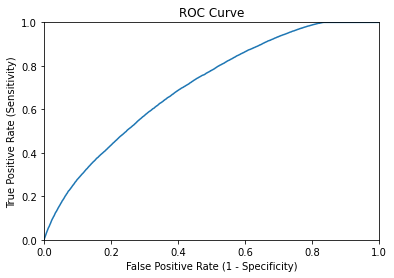

AUC :  0.7073495921095541


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = cred_data2['status_y']
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)

plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.show()

roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC : ', roc_auc)

## Handling Class Imbalance with Threshold variation

In [ ]:
# Converting predicted values into classes using new threshold
threshold=0.25
predicted_class=[ 0 if x < threshold else 1 for x in predictions]

# Confusion matrix and Accuracy

cm = confusion_matrix(cred_data2['status_y'], predicted_class)
print('Confusion Matrix : \n', cm)

total=sum(sum(cm))

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[27771 31589]
 [ 4339 18300]]
Accuracy :  0.5618483152233564


## Model Validation Parameters

In [ ]:
# Sensitivity (Recall of Class 0)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity / Recall(0) : ', sensitivity )

# Precision of Class 0
precision_0 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Precision Class 0 : ', precision_0 )

# F1 Score of Class 0
F1_class0 = 2/((1/precision_0)+(1/sensitivity))
print('F1 Score of CLass 0 : ', F1_class0 )

# Specificity (Recall of Class 1)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity / Recall(1) : ', specificity)

# Precision of Class 1
precision_1 = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision Class 1 : ', precision_1 )

# F1 Score of Class 1
F1_class1 = 2/((1/precision_1)+(1/specificity))
print('F1 Score of CLass 1 : ', F1_class1 )

Sensitivity / Recall(0) :  0.4678402964959569
Precision Class 0 :  0.8648707567735908
F1 Score of CLass 0 :  0.607215480485405
Specificity / Recall(1) :  0.8083395909713327
Precision Class 1 :  0.36681432780773315
F1 Score of CLass 1 :  0.5046326935804103


FINDINGS : At Threshold = 0.25 we are getting Specificity of 80.8% with sensitivity as 46.8%.

# MODEL 3 : Decision Tree

## Decision Tree with unbalanced data

In [167]:
# Building a Decision Tree with unbalanced data

from sklearn import tree

dtree_model = tree.DecisionTreeClassifier(max_leaf_nodes = 12) # 18, 12
dtree_model.fit(X_train2, y_train2)

train_acc= dtree_model.score(X_train2, y_train2)
print("train_accuracy", train_acc)

test_acc= dtree_model.score(X_test,y_test)
print("test_accuracy", test_acc)

print("Difference %", round((train_acc-test_acc)*100, 4))

train_accuracy 0.7360935380112502
test_accuracy 0.7323780487804878
Difference % 0.3715


In [168]:
# Predict on test data and create a confusion matrix

predict = dtree_model.predict(X_test)

cm = confusion_matrix(y_test, predict)
print('Confusion matrix : \n', cm)

Confusion matrix : 
 [[11587   203]
 [ 4186   424]]


## Model Validation Parameters

In [169]:
# Sensitivity (Recall of Class 0)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity / Recall(0) : ', sensitivity )

# Precision of Class 0
precision_0 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Precision Class 0 : ', precision_0 )

# F1 Score of Class 0
F1_class0 = 2/((1/precision_0)+(1/sensitivity))
print('F1 Score of CLass 0 : ', F1_class0 )

# Specificity (Recall of Class 1)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity / Recall(1) : ', specificity)

# Precision of Class 1
precision_1 = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision Class 1 : ', precision_1 )

# F1 Score of Class 1
F1_class1 = 2/((1/precision_1)+(1/specificity))
print('F1 Score of CLass 1 : ', F1_class1 )

Sensitivity / Recall(0) :  0.9827820186598812
Precision Class 0 :  0.7346097761998351
F1 Score of CLass 0 :  0.8407647933824328
Specificity / Recall(1) :  0.09197396963123644
Precision Class 1 :  0.6762360446570973
F1 Score of CLass 1 :  0.16192476608745465


Findings : Model accuracy is 73.2 %. But if we check the class wise accuracy we find that sensitivity is very high at 98.3%. But, like Logistic regression, specificity is very low at 9.2%. We need to build the model with balanced train data so that it can pick up the patterns in minority class 1, which is important to us.

## Decision Tree with balanced data

In [ ]:
# Building a Decision Tree with unbalanced data

from sklearn import tree

dtree_model = tree.DecisionTreeClassifier(max_leaf_nodes = 12) # 18, 12
dtree_model.fit(X_train,y_train)

train_acc= dtree_model.score(X_train,y_train)
print("train_accuracy", train_acc)

test_acc= dtree_model.score(X_test,y_test)
print("test_accuracy", test_acc)

print("Difference %", round((train_acc-test_acc)*100, 4))

train_accuracy 0.6371624101379504
test_accuracy 0.6222560975609757
Difference % 1.4906


Decision Tree with max_leaf_nodes = 12 gives the highest accuracy of 62.2%.

In [ ]:
# Create confusion matrix

predict = dtree_model.predict(X_test)

cm = confusion_matrix(y_test, predict)
print('Confusion matrix : \n', cm)

Confusion matrix : 
 [[7143 4647]
 [1548 3062]]


## Model Validation Parameters

In [ ]:
# Sensitivity (Recall of Class 0)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity / Recall(0) : ', sensitivity )

# Precision of Class 0
precision_0 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Precision Class 0 : ', precision_0 )

# F1 Score of Class 0
F1_class0 = 2/((1/precision_0)+(1/sensitivity))
print('F1 Score of CLass 0 : ', F1_class0 )

# Specificity (Recall of Class 1)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity / Recall(1) : ', specificity)

# Precision of Class 1
precision_1 = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision Class 1 : ', precision_1 )

# F1 Score of Class 1
F1_class1 = 2/((1/precision_1)+(1/specificity))
print('F1 Score of CLass 1 : ', F1_class1 )

Sensitivity / Recall(0) :  0.6058524173027989
Precision Class 0 :  0.8218847083189507
F1 Score of CLass 0 :  0.6975245349348177
Specificity / Recall(1) :  0.6642082429501085
Precision Class 1 :  0.3971980801660397
F1 Score of CLass 1 :  0.49711827258706065


## K-Fold validation
10 fold validation

In [ ]:
tree_KF = tree.DecisionTreeClassifier()

#Simple K-Fold cross validation. 10 folds on Test data.
from sklearn.model_selection import KFold
kfold_models = KFold(n_splits=10)

from sklearn import model_selection
scores = model_selection.cross_val_score(tree_KF,X_test, y_test,cv=kfold_models)
print(scores)
print("Avg K-Fold Accuracy", scores.mean())

[0.64207317 0.65731707 0.67317073 0.65914634 0.65365854 0.62987805
 0.63170732 0.63414634 0.6554878  0.65853659]
Avg K-Fold Accuracy 0.6495121951219512


The optimum accuracy we can obtain from this dataset using decision trees is around 65%. We obtained accuracy of 62.2% which is close to this.

## Plotting the Decision Tree

|--- curr_loan_amt_flag <= 0.50
|   |--- class: 0
|--- curr_loan_amt_flag >  0.50
|   |--- term <= 0.50
|   |   |--- cred_score <= 739.50
|   |   |   |--- income <= 1121798.00
|   |   |   |   |--- class: 1
|   |   |   |--- income >  1121798.00
|   |   |   |   |--- max_cred <= 382118.00
|   |   |   |   |   |--- cust_num <= 65806.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- cust_num >  65806.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- max_cred >  382118.00
|   |   |   |   |   |--- class: 0
|   |   |--- cred_score >  739.50
|   |   |   |--- cred_score <= 746.50
|   |   |   |   |--- income <= 1138518.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- income >  1138518.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- cred_score >  746.50
|   |   |   |   |--- class: 0
|   |--- term >  0.50
|   |   |--- credit_score_flag <= 0.50
|   |   |   |--- class: 1
|   |   |--- credit_score_flag >  0.50
|   |   |   |--- income <= 1167863.50
|   |   |   

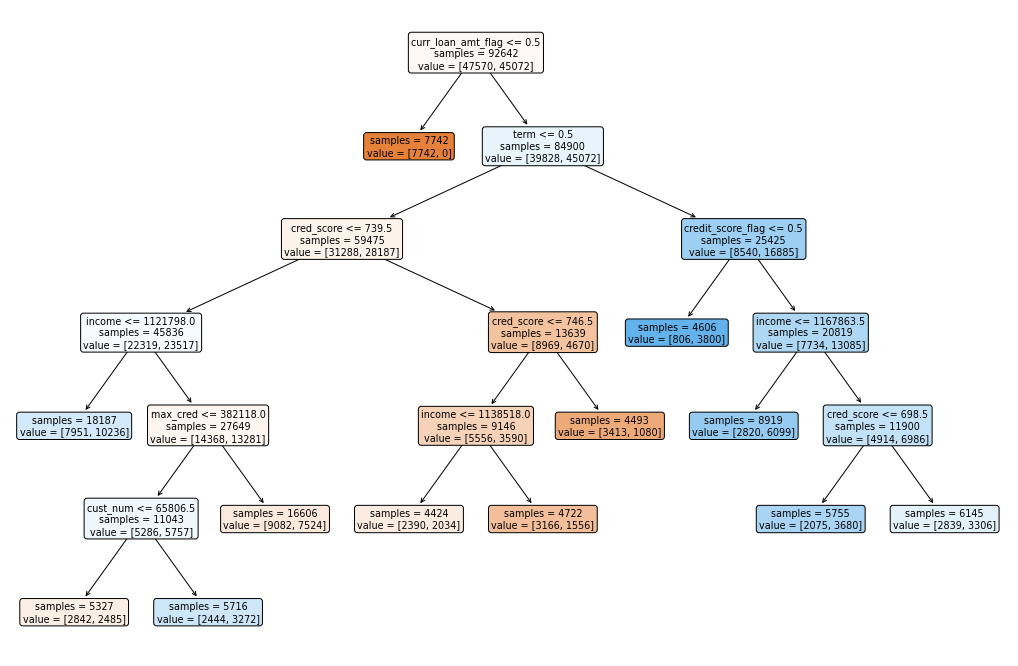

In [ ]:
##Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(18,12))
plot_tree(dtree_model, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(dtree_model, feature_names = features))

# MODEL FINALIZATION

## Model Comparison


|Model no	|Model Description				|Accuracy	|Sensitivity	|Specificity	|
|:----------|:------------------------------|:----------|:--------------|:--------------|
|1			|Logistic Regression			|58.0		|59.2			|55.0			|
|2			|Logistic Reg. threshold = 0.25	|56.2		|46.8		    |80.8           |
|3			|Decision Tree					|62.2		|60.6		    |66.4           |



##### From this data we can select MODEL-3 Decision Tree as the best model considering overall results.
------------------
